# Imports

## Libraries

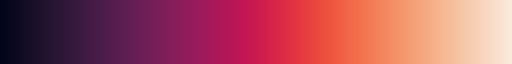

In [1567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
import seaborn as sns
from collections import Counter
import ast
from prince import MCA
from matplotlib import cm
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8')
sns.color_palette("rocket", as_cmap=True)

# LLN

## Imports

In [1568]:
dir_path = "files/Thesis_Files/LLN"

In [1569]:
# Weighted Probability
values = [4, 10, 350, 1000, 10000, 50000, 100000, 1000000]
weighted_tests = dict()
for v in values:
    weighted_tests[v] = pd.read_csv(f'{dir_path}/LLN_Test_{v}.csv', header=0)

alt_tests = dict()
for v in values:
    alt_tests[v] = pd.read_csv(f'{dir_path}/LLN_Test_{v}_alt.csv', header=0)


## Analysis

In [1570]:
def build_prob_plot(title, dictionary, value):
    fig, ax = plt.subplots()

    # Group by 'Sort' column and count elements in each group
    group_counts = dictionary[value].groupby('Sort').size()
    
    # Plotting
    my_sum = sum(group_counts.values)
    plt.bar(group_counts.index, (group_counts.values)/my_sum)
    ax.set_xlabel('Topological Sort')
    ax.set_ylabel('Probability of Topological Sort')
    ax.set_title(title)
    
    for i, count in enumerate(group_counts):
        ax.text(i, count/my_sum, str(round(count/my_sum,3)), ha='center', va='bottom')

    plt.savefig(f"thesis_figures/{title.replace('-', '').replace(' ','_')}.png", dpi=1200)
    plt.show()


### Probabilistic Kahn's with Weights

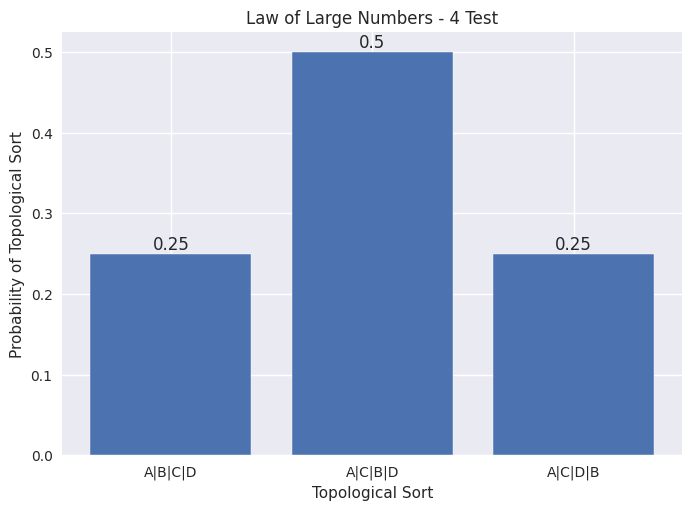

In [1571]:
build_prob_plot("Law of Large Numbers - 4 Test", weighted_tests, 4)

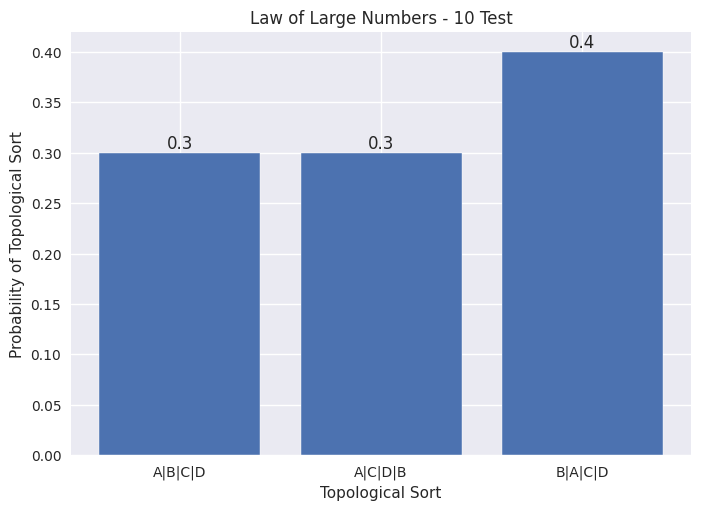

In [1572]:
build_prob_plot("Law of Large Numbers - 10 Test", weighted_tests, 10)

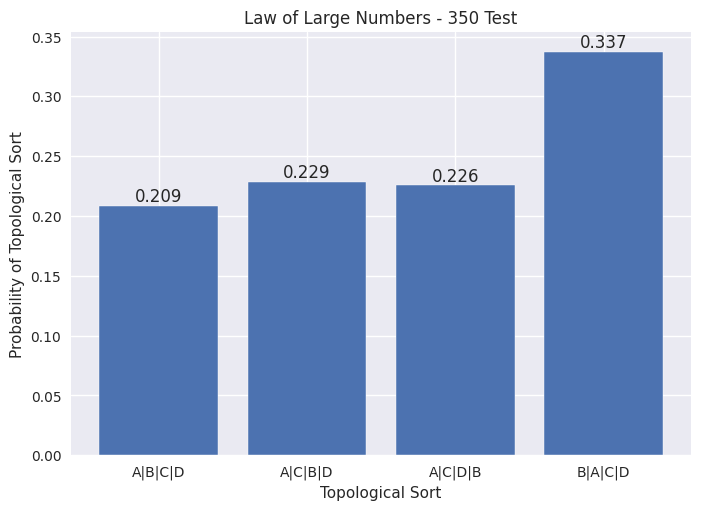

In [1573]:
build_prob_plot("Law of Large Numbers - 350 Test", weighted_tests, 350)

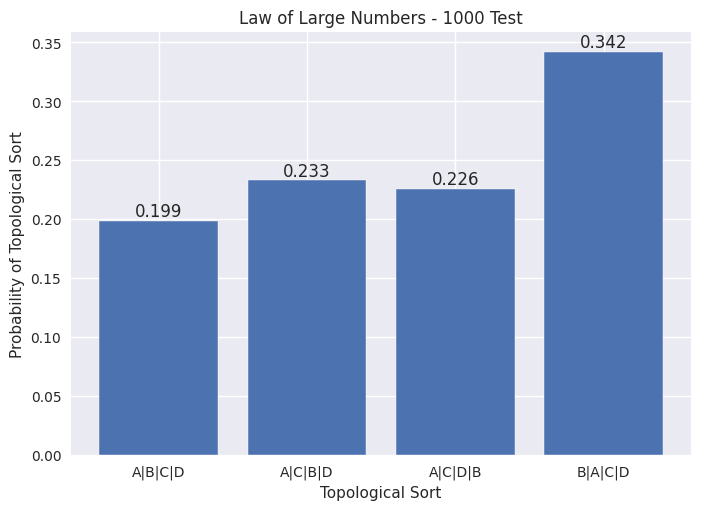

In [1574]:
build_prob_plot("Law of Large Numbers - 1000 Test", weighted_tests, 1000)

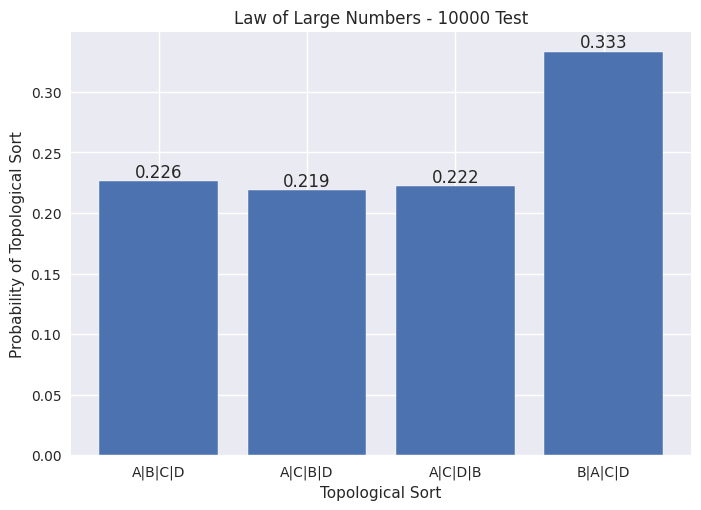

In [1575]:
build_prob_plot("Law of Large Numbers - 10000 Test", weighted_tests, 10000)

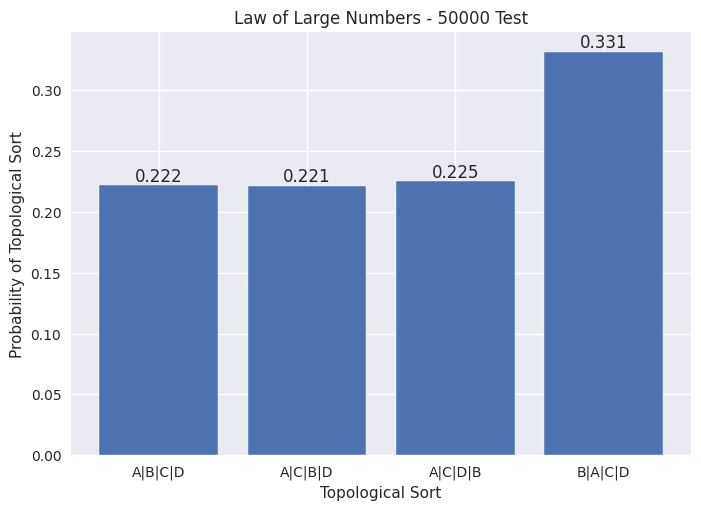

In [1576]:
build_prob_plot("Law of Large Numbers - 50000 Test", weighted_tests, 50000)

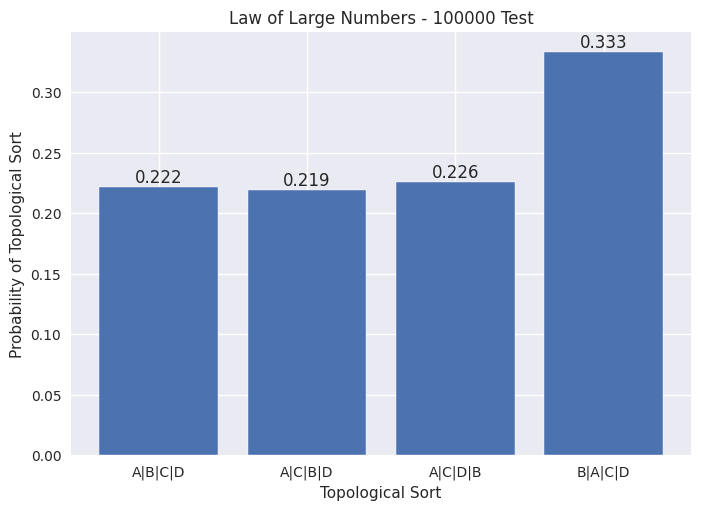

In [1577]:
build_prob_plot("Law of Large Numbers - 100000 Test", weighted_tests, 100000)

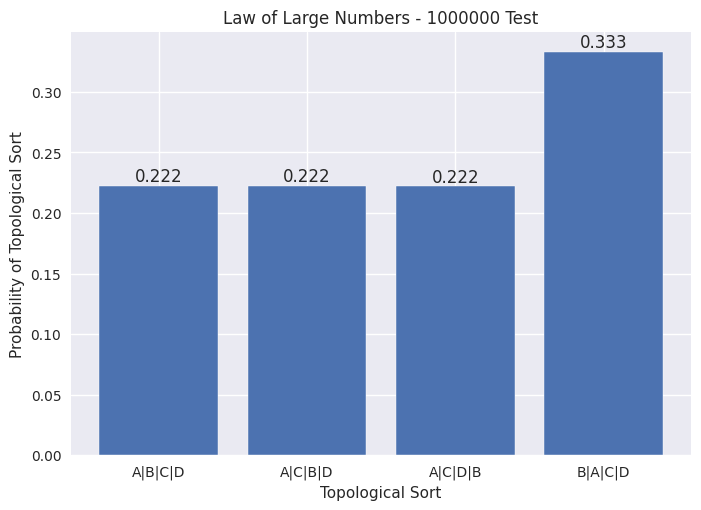

In [1578]:
build_prob_plot("Law of Large Numbers - 1000000 Test", weighted_tests, 1000000)

### Probabilistic Kahn's without Weights

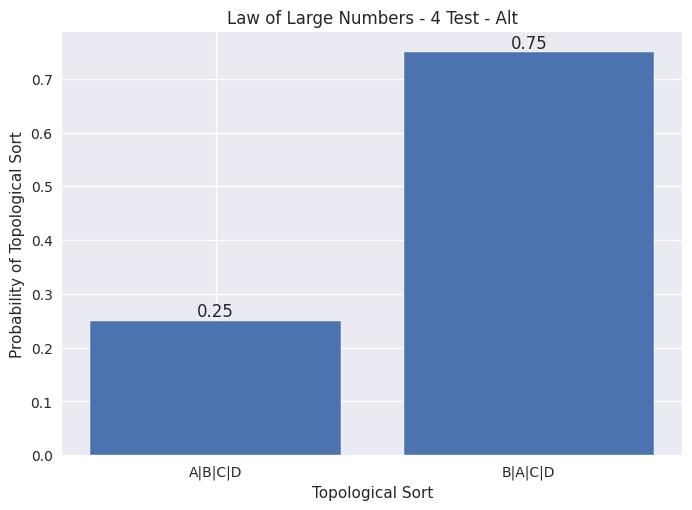

In [1579]:
build_prob_plot("Law of Large Numbers - 4 Test - Alt", alt_tests, 4)

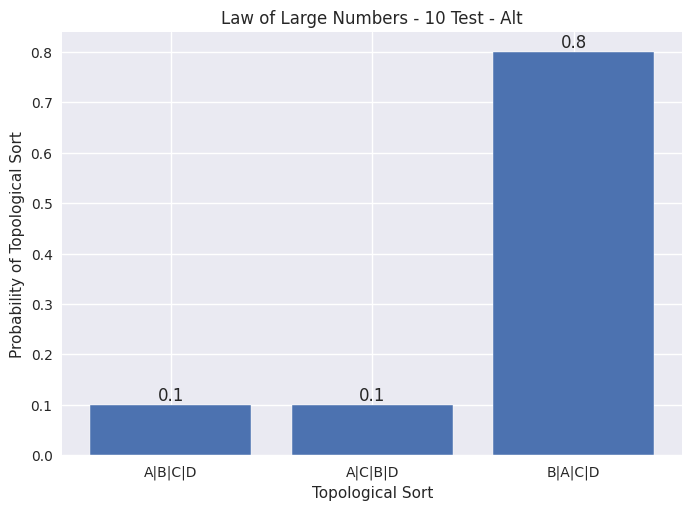

In [1580]:
build_prob_plot("Law of Large Numbers - 10 Test - Alt", alt_tests, 10)

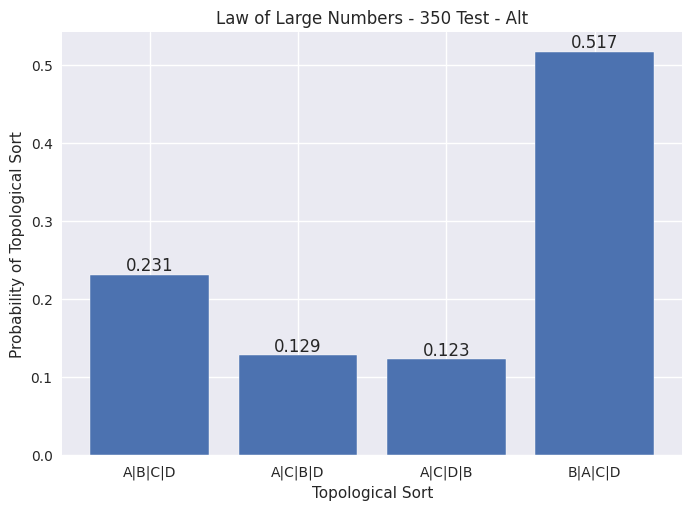

In [1581]:
build_prob_plot("Law of Large Numbers - 350 Test - Alt", alt_tests, 350)

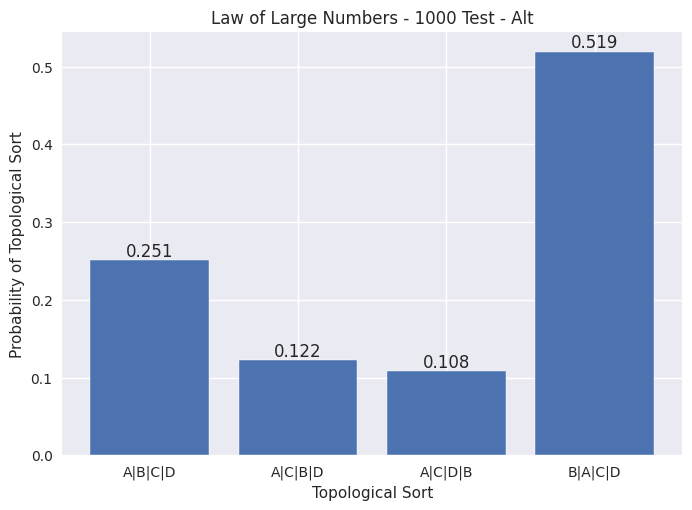

In [1582]:
build_prob_plot("Law of Large Numbers - 1000 Test - Alt", alt_tests, 1000)

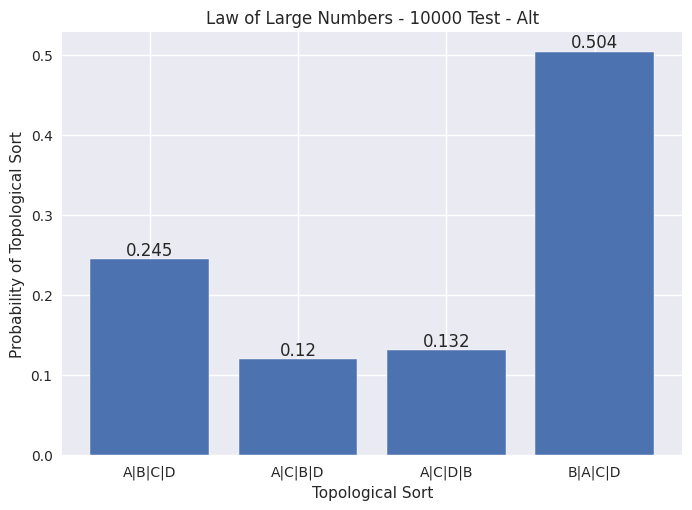

In [1583]:
build_prob_plot("Law of Large Numbers - 10000 Test - Alt", alt_tests, 10000)

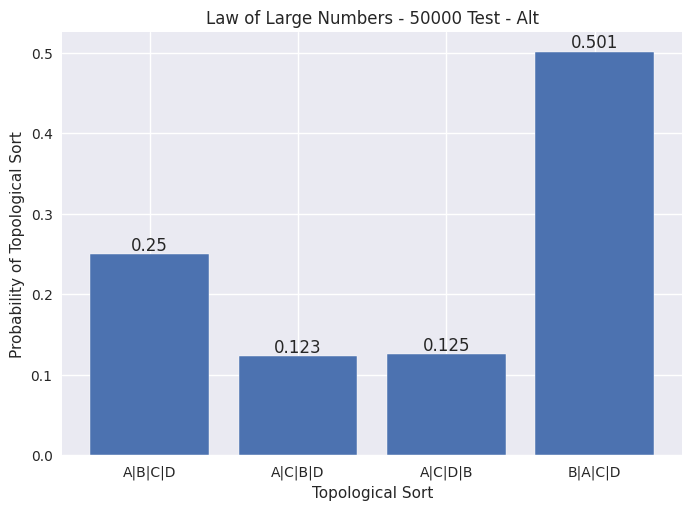

In [1584]:
build_prob_plot("Law of Large Numbers - 50000 Test - Alt", alt_tests, 50000)

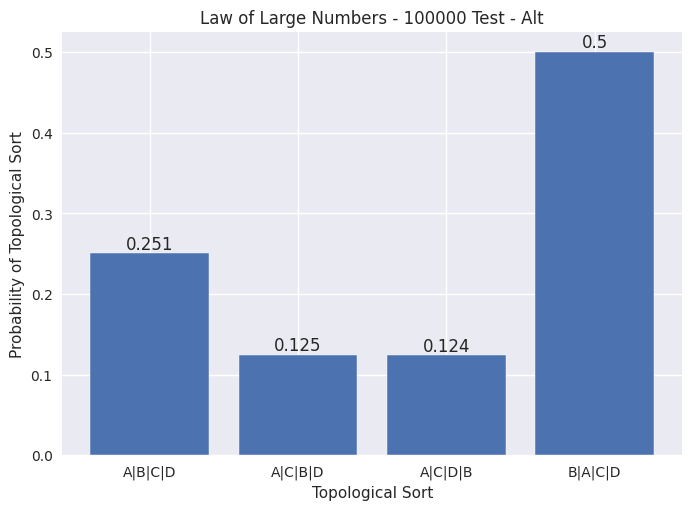

In [1585]:
build_prob_plot("Law of Large Numbers - 100000 Test - Alt", alt_tests, 100000)

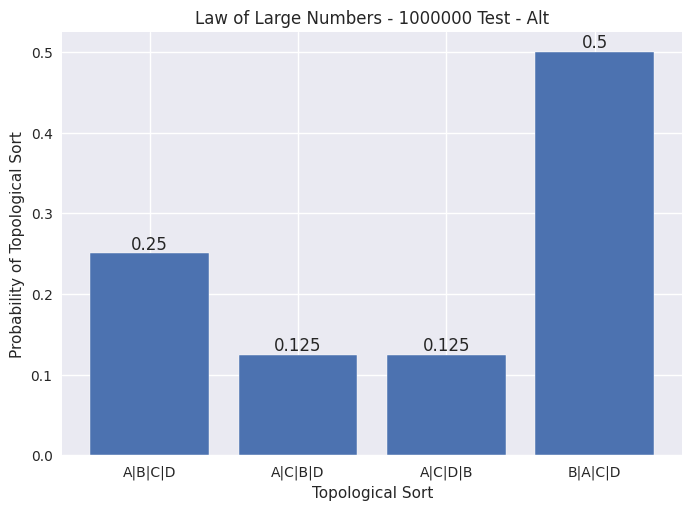

In [1586]:
build_prob_plot("Law of Large Numbers - 1000000 Test - Alt", alt_tests, 1000000)

# Flag Selection

## Imports

In [1587]:
dir_path = "files/Thesis_Files/flag_selection"

In [1588]:
# cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-BOCA-FlagSelection_new-0.csv", index_col=[0])
# cacheprof_GA = pd.read_csv(f"{dir_path}/cacheprof-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-BOCA-FlagSelection_new-0.csv", index_col=[0])
# hidden_GA = pd.read_csv(f"{dir_path}/hidden-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-BOCA-FlagSelection_new-0.csv", index_col=[0])
# maillist_GA = pd.read_csv(f"{dir_path}/maillist-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-BOCA-FlagSelection_new-0.csv", index_col=[0])
# sorting_GA = pd.read_csv(f"{dir_path}/sorting-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-BOCA-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
cacheprof_GA = pd.read_csv(f"{dir_path}/cacheprof-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-BOCA-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
hidden_GA = pd.read_csv(f"{dir_path}/hidden-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-BOCA-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
maillist_GA = pd.read_csv(f"{dir_path}/maillist-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-BOCA-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
sorting_GA = pd.read_csv(f"{dir_path}/sorting-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# Iterative Ones
cacheprof_RIO =  pd.read_csv(f"{dir_path}/cacheprof-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/cacheprof-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
cacheprof_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)

maillist_RIO =  pd.read_csv(f"{dir_path}/maillist-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/maillist-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
cacheprof_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)

hidden_RIO =  pd.read_csv(f"{dir_path}/hidden-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/hidden-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
cacheprof_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)

sorting_RIO =  pd.read_csv(f"{dir_path}/sorting-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    sorting_RIO = pd.concat([sorting_RIO, pd.read_csv(f"{dir_path}/sorting-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
sorting_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)


# Default O2
# Control Group (O2 In Default Order)
dir_path = "files/Thesis_Files/phase_order"
cacheprof_default = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-BIGRIO-0.csv", index_col=[0])
hidden_default = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
maillist_default =  pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
sorting_default = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])

program_tables = {"maillist": {"BOCA": maillist_BOCA, "GA": maillist_GA, "RIO": maillist_RIO}, "hidden": {"BOCA": hidden_BOCA, "GA": hidden_GA, "RIO": hidden_RIO}, "cacheprof": {"BOCA": cacheprof_BOCA, "GA": cacheprof_GA, "RIO": cacheprof_RIO}, "sorting": {"BOCA": sorting_BOCA, "GA": sorting_GA, "RIO": sorting_RIO}}
default_O2 = {"maillist": maillist_default, "hidden": hidden_default, "sorting": sorting_default, "cacheprof": cacheprof_default}

for d in program_tables.values():
    for d_name, df in d.items():
        if not (df is None):
            df.set_index("ID", inplace=True)


for d_name, d in program_tables.items():
    for type, t in d.items():
        if type == "GA":
            t.rename(columns={'Fitness': 'Runtime'}, inplace=True)

print(program_tables["cacheprof"]["GA"].count())


Mode       113
Flags      113
Runtime    113
dtype: int64


In [1589]:
flags = ["-fcall-arity", "-fcase-merge", "-fcmm-elim-common-blocks", "-fcmm-sink", "-fcpr-anal", "-fcse","-fdicts-cheap", "-fdicts-strict", "-fdmd-tx-dict-sel", "-fdo-eta-reduction", "-fdo-lambda-eta-expansion","-feager-blackholing", "-fenable-rewrite-rules", "-fexcess-precision", "-fexpose-all-unfoldings","-ffloat-in", "-ffull-laziness", "-ffun-to-thunk", "-fignore-asserts", "-fignore-interface-pragmas","-flate-dmd-anal", "-fliberate-case", "-fliberate-case-threshold=2000", "-floopification", "-fmax-inline-alloc-size=128","-fmax-inline-memcpy-insns=32", "-fmax-inline-memset-insns=32", "-fmax-relevant-binds=6", "-fmax-simplifier-iterations=4","-fmax-worker-args=10", "-fno-opt-coercion", "-fno-pre-inlining", "-fno-state-hack", "-fomit-interface-pragmas", "-fomit-yields","-foptimal-applicative-do", "-fpedantic-bottoms", "-fregs-graph", "-fregs-iterative", "-fsimplifier-phases=2", "-fsimpl-tick-factor=100","-fspec-constr", "-fspec-constr-count=3", "-fspec-constr-threshold=2000", "-fspecialise", "-fcross-module-specialise", "-fstatic-argument-transformation","-fstrictness", "-fstrictness-before=1", "-funbox-small-strict-fields", "-funbox-strict-fields", "-funfolding-creation-threshold=750","-funfolding-dict-discount=30", "-funfolding-fun-discount=60", "-funfolding-keeness-factor=1.5", "-funfolding-use-threshold=60","-fvectorisation-avoidance", "-fvectorise", "-fworker-wrapper"]

## Data Preparation

### Get Best Rows & Update Dictionaries

In [1590]:
# Create the new dictionary to store the updated values
updated_program_tables = dict()
for program, config_dict in program_tables.items():
    updated_config_dict = dict()
    
    for config, dataframe in config_dict.items():
        if dataframe is not None:
            # Extract rows by index
            #print(dataframe.head(4))
            row_O0 = dataframe.loc["-O0"]
            row_O2 = dataframe.loc["-O2"]
            # Find the row with the minimum "Runtime" value
            best_row = dataframe.loc[dataframe["Runtime"].idxmin()]
            
            # Create the new dictionary for the current configuration
            updated_config = {
                "table": dataframe,
                "-O0": row_O0,
                "-O2": row_O2,
                "Best": best_row
            }
            
            updated_config_dict[config] = updated_config
    
    updated_program_tables[program] = updated_config_dict
# Now, `updated_program_tables` contains the updated dictionary as you specified.

## Analysis

### Table: -O0 vs. -O2 vs. Optimal

In [1591]:
# Assuming `updated_program_tables` contains your updated dictionary
data = []
programs = list(updated_program_tables.keys())
configurations = ["BOCA", "GA", "RIO"]
columns = ["-O0", "-O2", "Optimal", "Improvement", "Avg"]

for program in programs:
    program_data = []
    row_O0s = []
    row_O2s = []
    for config in configurations:
        if updated_program_tables[program][config] is not None:
            row_O0 = updated_program_tables[program][config]["-O0"]["Runtime"]
            row_O2 = updated_program_tables[program][config]["-O2"]["Runtime"]
            best_row = updated_program_tables[program][config]["Best"]["Runtime"]
            improvement = f"{round(-1*(1 - best_row/row_O2)*100,3)}%"
            average = f"{round(-1*(1 - program_tables[program][config]['Runtime'].mean()/row_O2)*100,3)}%"
            program_data.append([row_O0, row_O2, best_row, improvement, average])
            row_O0s.append(row_O0)
            row_O2s.append(row_O2)
        else:
            program_data.append([None, None, None])
    data.extend(program_data)
    for config in configurations:
        updated_program_tables[program][config]["-O0"]["Runtime"] = round(np.mean(row_O0s),3)
        updated_program_tables[program][config]["-O2"]["Runtime"] = round(np.mean(row_O2s),3)

# Create a MultiIndex with program and configuration levels
index = pd.MultiIndex.from_product([programs, configurations], names=["Program", "Configuration"])

# Reshape data into a DataFrame
df = pd.DataFrame(data, columns=columns)

# Assign the MultiIndex
df.index = index
print(df)


                           -O0    -O2  Optimal Improvement      Avg
Program   Configuration                                            
maillist  BOCA           0.646  0.646    0.548     -15.17%  -1.031%
          GA             0.535  0.535    0.520     -2.804%   2.371%
          RIO            0.527  0.527    0.520     -1.328%   2.059%
hidden    BOCA           0.482  0.482    0.471     -2.282%   0.009%
          GA             0.517  0.517    0.501     -3.095%  -0.226%
          RIO            0.521  0.514    0.506     -1.556%   0.719%
cacheprof BOCA           0.343  0.343    0.336     -2.041%   0.835%
          GA             0.437  0.437    0.431     -1.373%   0.407%
          RIO            0.439  0.439    0.431     -1.822%  12.943%
sorting   BOCA           0.207  0.207    0.204     -1.449%   1.364%
          GA             0.211  0.211    0.207     -1.896%  -0.474%
          RIO            0.211  0.208    0.207     -0.481%   1.106%


### Box-Plots to Show Distribution

#### Normalization Calculation Set-Up

##### -O2

In [1592]:
normalize_around = "-O2"

for program, config_dict in updated_program_tables.items():
    for config, table_data in config_dict.items():
        if table_data is not None:
            df = table_data["table"]
            df["Norm-Z"] = (df["Runtime"] - df["Runtime"].mean()) / df["Runtime"].std()
            row_O0 = df.loc["-O0"]
            row_O2 = df.loc["-O2"]
            shift = row_O2["Runtime"]
            #df["Norm-O2"] = (df["Runtime"] - shift) / df["Runtime"].std()
            df["Norm-O2"] = (df["Runtime"] - shift) / default_O2[program]["Runtime"].std()

#### Z-Score

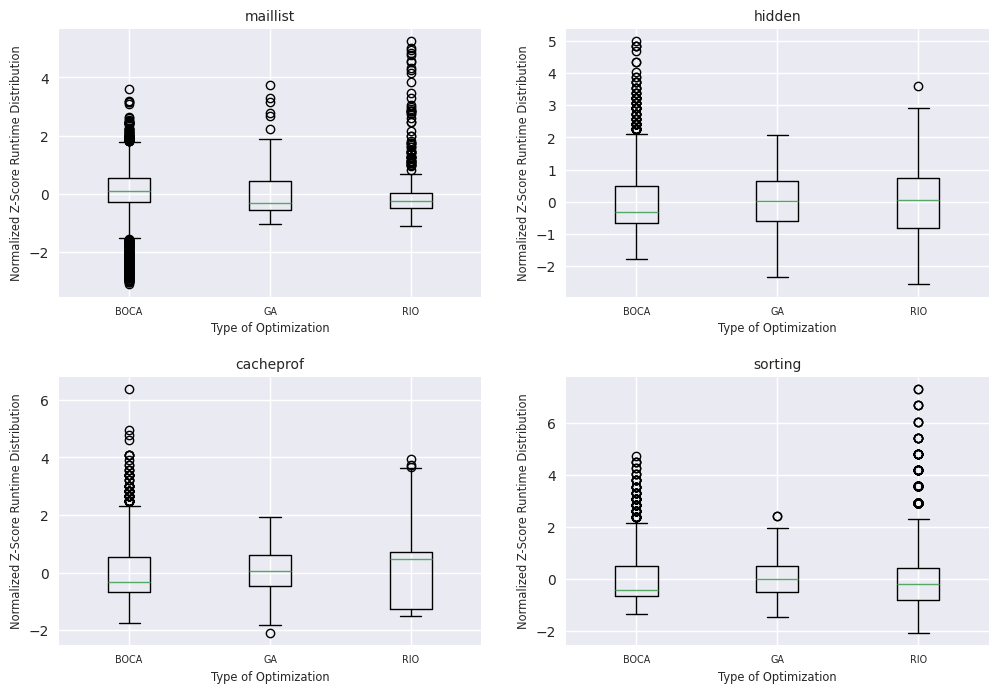

In [1593]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

lst1 = []
labels = []

i = 0
j = 0
for program_name, type_dict in updated_program_tables.items():
    lst1 = []
    labels = []
    for type_name, type_results in type_dict.items():
        if type_name != "IO":
            labels.append(type_name)
            df = type_results["table"]
            lst1.append(df["Norm-Z"])
    # if i == 2:
    #     i = 0
    #     if j == 2:
    #         j == 0
    #     else:
    #         j += 1
    # i += 1
    ax[i][j].boxplot(lst1)
    ax[i][j].set_xticklabels(labels, fontsize="xx-small")
    ax[i][j].set_ylabel(f"Normalized Z-Score Runtime Distribution", fontsize="x-small")
    ax[i][j].set_xlabel(f"Type of Optimization", fontsize="x-small")
    if i ==  0:
        ax[i][j].set_title(f"{program_name}", pad=20)
    ax[i][j].set_title(f"{program_name}", fontsize="small")
    
    j = (j + 1) % 2
    if j == 0:
        i = (i + 1) % 2

plt.savefig('thesis_figures/Z_score_boxplot.png', format='png', dpi=1200)
plt.savefig('thesis_figures/Z_score_boxplot.svg', format='svg', dpi=1200)
plt.show()

#### -O2

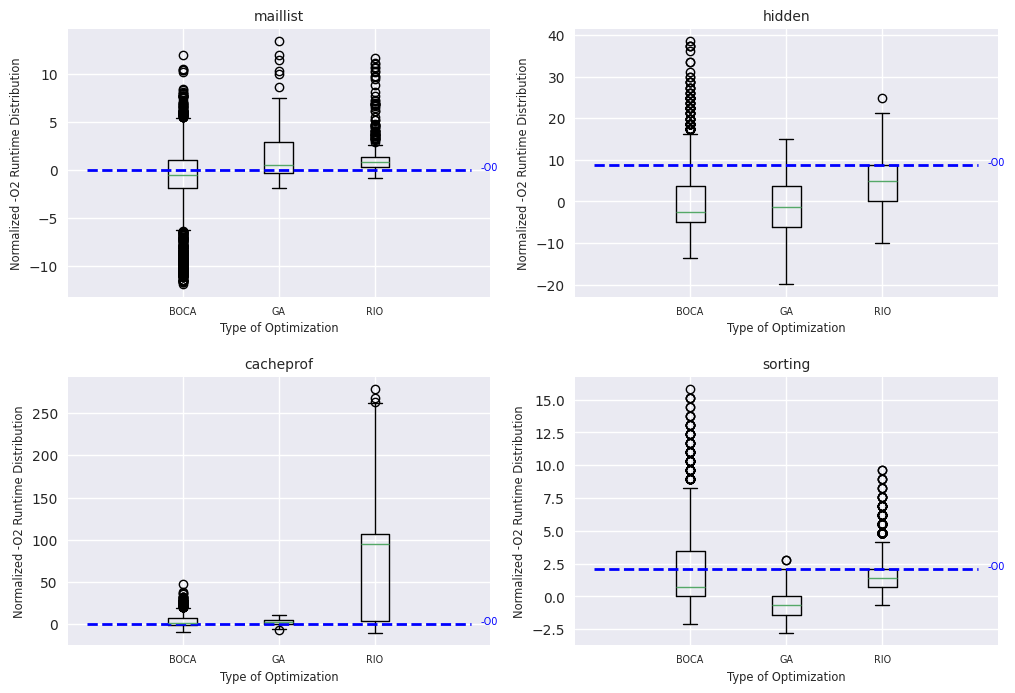

In [1594]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

lst1 = []
labels = []

i = 0
j = 0
for program_name, type_dict in updated_program_tables.items():
    lst1 = []
    labels = []
    O0_line = 0
    for type_name, type_results in type_dict.items():
        labels.append(type_name)
        df = type_results["table"]
        #print(df["Norm-O2"].head(4))
        O0_line = df.loc["-O0"]["Norm-O2"]
        lst1.append(df["Norm-O2"])


    
    ax[i][j].boxplot(lst1)
    ax[i][j].set_xticklabels(labels, fontsize="xx-small")
    ax[i][j].set_ylabel(f"Normalized -O2 Runtime Distribution", fontsize="x-small")
    ax[i][j].set_xlabel(f"Type of Optimization", fontsize="x-small")
    ax[i][j].set_title(f"{program_name}", fontsize="small")

    ax[i][j].hlines(y=O0_line, xmin=0, xmax=len(labels) + 1, color='b', linestyle='dashed', linewidth=2)
    ax[i][j].text(len(labels) + 1.1, O0_line, '-O0', fontsize='xx-small', color='b')
    
    j = (j + 1) % 2
    if j == 0:
        i = (i + 1) % 2

plt.savefig('thesis_figures/O2_score_boxplot.png', format='png', dpi=1200)
plt.savefig('thesis_figures/O2_score_boxplot.svg', format='svg', dpi=1200)
plt.show()


### Convergence

[[56 31 49 50]
 [28 27 28 30]
 [28 13 20 25]]
{'maillist': {'BOCA': 56, 'GA': 28, 'Both': 28}, 'hidden': {'BOCA': 31, 'GA': 27, 'Both': 13}, 'cacheprof': {'BOCA': 49, 'GA': 28, 'Both': 20}, 'sorting': {'BOCA': 50, 'GA': 30, 'Both': 25}}


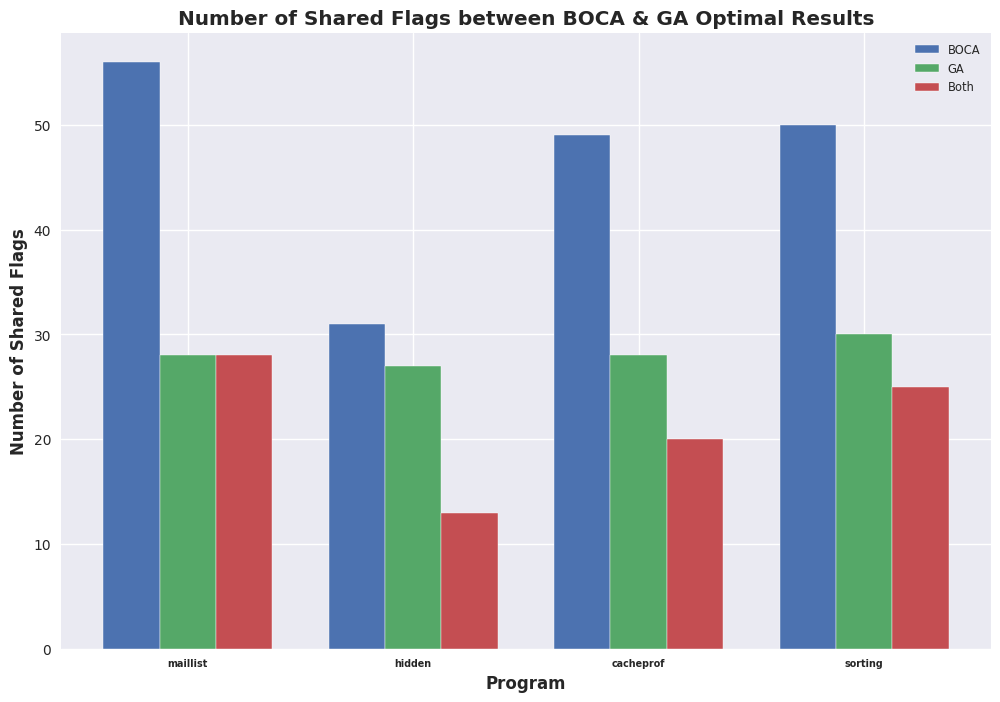

In [1595]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

occuring_flags = []
labels = []

i = 0
j = 0
convergence_dict = dict()
for program_name, type_dict in updated_program_tables.items():
    occuring_flags = []
    labels = []
    for type_name, type_results in type_dict.items():
        if type_name != "RIO":
            best_flags = type_results["Best"]["Flags"]
            best_flags = eval(best_flags)[1:]
            occuring_flags.append(best_flags)
            labels.append(type_name)
            
    if len(occuring_flags) > 0:
        num_of_match = list(set(occuring_flags[0]).intersection(set(occuring_flags[1])))
        convergence_dict[program_name] = {labels[0]: len(occuring_flags[0]), labels[1]: len(occuring_flags[1]), "Both": len(num_of_match)}

programs = list(convergence_dict.keys())
configurations = list(convergence_dict["sorting"].keys())
values = np.array([[convergence_dict[program][config] for program in programs] for config in configurations])

print(values)

width = 0.25
x = np.arange(len(programs))

for i, config in enumerate(configurations):
    ax.bar(x + i * width, values[i], width=width, label=config)

ax.set_xlabel('Program', fontsize="medium", weight='bold')
ax.set_ylabel('Number of Shared Flags', fontsize="medium", weight='bold')
ax.set_title('Number of Shared Flags between BOCA & GA Optimal Results', fontsize="large", weight='bold')
ax.set_xticks(x + width * (len(configurations) - 1) / 2)
ax.set_xticklabels(programs, fontsize="xx-small", weight='bold')
ax.legend(fontsize="x-small")

print(convergence_dict)

plt.savefig('thesis_figures/converg_barplot.svg', format='svg', dpi=1200)
plt.savefig('thesis_figures/converg_barplot.png', format='png', dpi=1200)
plt.show()

### Remaining Benchmark Allowance

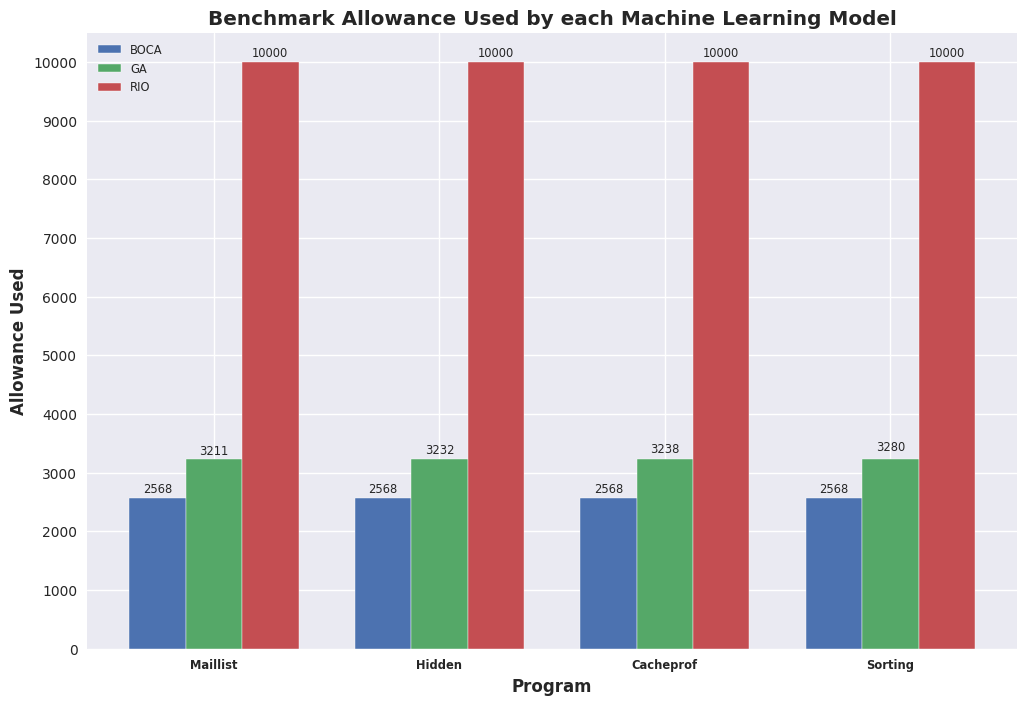

In [1596]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

programs = ["Maillist", "Hidden", "Cacheprof", "Sorting"]
ml_models = ["BOCA", "GA", "RIO"]
boca_data = [2568, 2568, 2568, 2568]
ga_data = [3211, 3232, 3238, 3280]
rio_data = [10000, 10000, 10000, 10000]

data_list = [boca_data, ga_data, rio_data]

width = 0.25
x = np.arange(len(programs))

for i, config in enumerate(data_list):
    ax.bar(x + i * width, config[i], width=width, label=ml_models[i])

    for j, value in enumerate(config):
        ax.text(x[j] + i * width, value + 50, str(value), ha='center', va='bottom', fontsize="x-small")

ax.set_xlabel('Program', fontsize="medium", weight='bold')
ax.set_ylabel('Allowance Used', fontsize="medium", weight='bold')
ax.set_title('Benchmark Allowance Used by each Machine Learning Model', fontsize="large", weight='bold')
ax.set_xticks(x + width * (len(configurations) - 1) / 2)
ax.set_yticks(np.arange(0, max(max(data_list)) + 1000, 1000))
ax.set_xticklabels(programs, fontsize="x-small", weight='bold')
ax.legend(fontsize="x-small")


plt.savefig('thesis_figures/allowance_plot.svg', format='svg', dpi=1200)
plt.savefig('thesis_figures/allowance_plot.png', format='png', dpi=1200)
plt.show()


## Feature Importance

### PCA Analysis

#### Scaling

In [1597]:
scaling_tables = program_tables.copy()

feature_df = pd.DataFrame(columns=flags + ["Runtime"])
scaled_data = []

# Iterate through each row in the original DataFrame
for program_name, config_dict in program_tables.items():
    for config, df in config_dict.items():
        df = df.iloc[2:]
        df["Flags"] = df["Flags"].apply(ast.literal_eval)
        new_rows = []
        for index, row in df.iterrows():
            # Initialize a list to hold flag values for this row
            flag_values = [0] * len(flags)
            
            # Iterate through each flag in the row
            #print(row['Flags'])
            for index, flag in enumerate(row.Flags):
                # Find the index of the flag in my_flags and set the corresponding value to 1
                if flag in flags:
                    flag_values[flags.index(flag)] = 1
                
            # Append the row to the new DataFrame with flag values and Runtime
            new_rows.append(flag_values + [None])
        scaling=StandardScaler()
        scaling.fit(np.array(df["Runtime"]).reshape(-1, 1))
        scaled_data=scaling.transform(np.array(df["Runtime"]).reshape(-1, 1))
        for index, row in enumerate(new_rows):
            row[len(row) - 1] = scaled_data[index][0]
        new_df = pd.DataFrame(columns=feature_df.columns, data=new_rows)
        feature_df = pd.concat([feature_df, new_df], axis=0)
        

# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(np.array(feature_df["Runtime"]).reshape(-1, 1))
# scaled_data=scaling.transform(np.array(feature_df["Runtime"]).reshape(-1, 1))

feature_df.tail(3)

-fcall-arity -fcase-merge -fcmm-elim-common-blocks -fcmm-sink -fcpr-anal  \
9556            0            0                        0          0          0   
9557            0            0                        0          0          0   
9558            0            0                        0          0          0   

     -fcse -fdicts-cheap -fdicts-strict -fdmd-tx-dict-sel -fdo-eta-reduction  \
9556     0             0              0                 0                  0   
9557     0             0              0                 0                  0   
9558     0             0              0                 0                  0   

      ... -funbox-strict-fields -funfolding-creation-threshold=750  \
9556  ...                     0                                  0   
9557  ...                     0                                  0   
9558  ...                     0                                  0   

     -funfolding-dict-discount=30 -funfolding-fun-discount=60  \
9556                            0                           0   
9557                            0                           0   
9558                            0                           0   

     -funfolding-keeness-factor=1.5 -funfolding-use-threshold=60  \
9556                              0                            0   
9557                              0                            0   
9558                              0                            0   

     -fvectorisation-avoidance -fvectorise -fworker-wrapper   Runtime  
9556                         0           0                0 -0.188277  
9557                         0           0                0  1.062847  
9558                         0           0                0 -0.813839  

[3 rows x 60 columns]

In [1598]:
feature_df[feature_df["-fcall-arity"] == 1]

-fcall-arity -fcase-merge -fcmm-elim-common-blocks -fcmm-sink -fcpr-anal  \
0              1            0                        1          0          1   
3              1            1                        1          1          1   
5              1            1                        0          1          0   
9              1            1                        1          1          1   
11             1            1                        1          1          0   
..           ...          ...                      ...        ...        ...   
107            1            0                        0          1          1   
109            1            0                        1          1          1   
111            1            0                        0          0          0   
116            1            1                        1          1          0   
118            1            1                        0          1          0   

    -fcse -fdicts-cheap -fdicts-strict -fdmd-tx-dict-sel -fdo-eta-reduction  \
0       1             0              1                 0                  1   
3       1             1              1                 1                  1   
5       1             1              1                 1                  1   
9       0             0              0                 1                  0   
11      1             1              1                 1                  0   
..    ...           ...            ...               ...                ...   
107     0             1              1                 1                  0   
109     0             1              1                 0                  1   
111     1             1              1                 0                  0   
116     0             1              1                 1                  1   
118     0             0              1                 1                  1   

     ... -funbox-strict-fields -funfolding-creation-threshold=750  \
0    ...                     0                                  0   
3    ...                     1                                  1   
5    ...                     1                                  1   
9    ...                     0                                  0   
11   ...                     0                                  0   
..   ...                   ...                                ...   
107  ...                     1                                  1   
109  ...                     0                                  0   
111  ...                     0                                  0   
116  ...                     1                                  1   
118  ...                     0                                  1   

    -funfolding-dict-discount=30 -funfolding-fun-discount=60  \
0                              1                           0   
3                              1                           1   
5                              1                           1   
9                              1                           0   
11                             1                           1   
..                           ...                         ...   
107                            0                           0   
109                            1                           0   
111                            1                           1   
116                            1                           0   
118                            0                           0   

    -funfolding-keeness-factor=1.5 -funfolding-use-threshold=60  \
0                                0                            1   
3                                1                            0   
5                                1                            1   
9                                1                            1   
11                               1                            1   
..                             ...                          ...   
107                        

#### PCA Chart

In [1599]:
principal = PCA(n_components=3)
principal.fit(feature_df.drop("Runtime",axis=1))
x = principal.transform(feature_df.drop("Runtime",axis=1))
 
# Check the dimensions of data after PCA
print(x.shape)

(49809, 3)


In [1600]:
principal.components_

array([[ 0.12223106,  0.12460722,  0.11946841,  0.07094013,  0.09227188,
         0.1336264 ,  0.132864  ,  0.14511229,  0.14177557,  0.14250608,
         0.12600726,  0.12063789,  0.13155869,  0.11295362,  0.13170519,
         0.11653571,  0.12496308,  0.12991667,  0.12912807,  0.09154587,
         0.13011681,  0.13462866,  0.10136967,  0.12191866,  0.13227092,
         0.13343107,  0.13984533,  0.13345085,  0.14160014,  0.11222938,
         0.14185943,  0.1285263 ,  0.14694301,  0.11997358,  0.11940055,
         0.10115327,  0.13544008,  0.1410914 ,  0.11009634,  0.15448136,
         0.12629144,  0.1608697 ,  0.13309524,  0.15798783,  0.11941571,
         0.15188351,  0.15941447,  0.12381097,  0.15771125,  0.11526415,
         0.11989946,  0.12526877,  0.13456315,  0.1333682 ,  0.15277093,
         0.09678345,  0.12794306,  0.13045711,  0.16160236],
       [ 0.17599655, -0.09422953, -0.15850615,  0.11036809,  0.14503174,
         0.17146181,  0.10056127, -0.16150797, -0.15119694, -0.

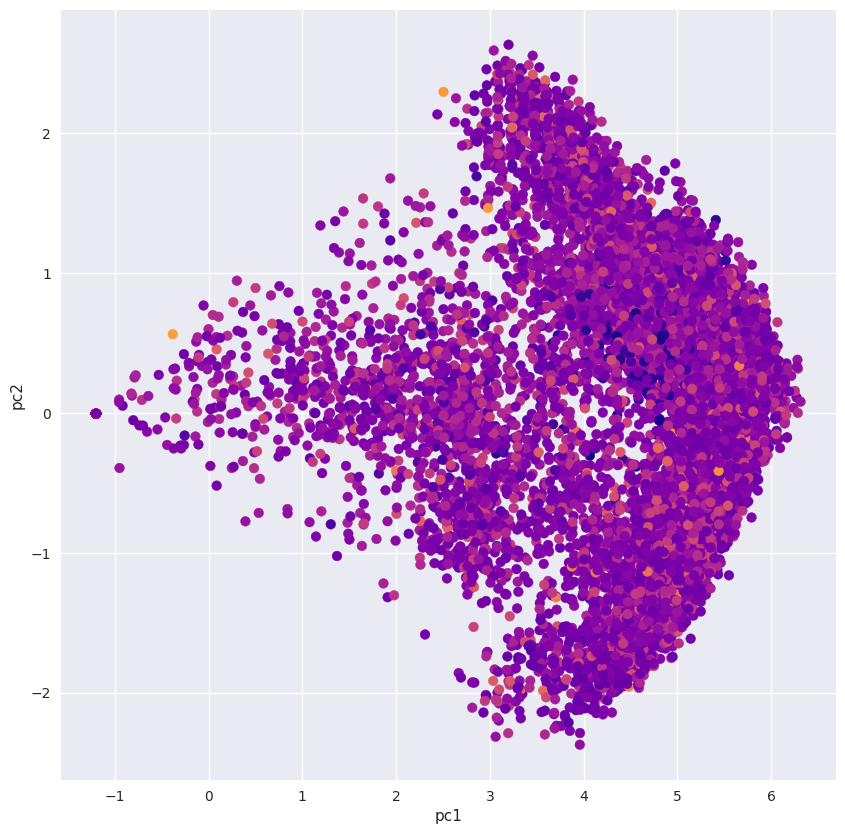

In [1601]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=feature_df['Runtime'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('thesis_figures/PCA_2d_plot.svg', format='svg', dpi=1200)

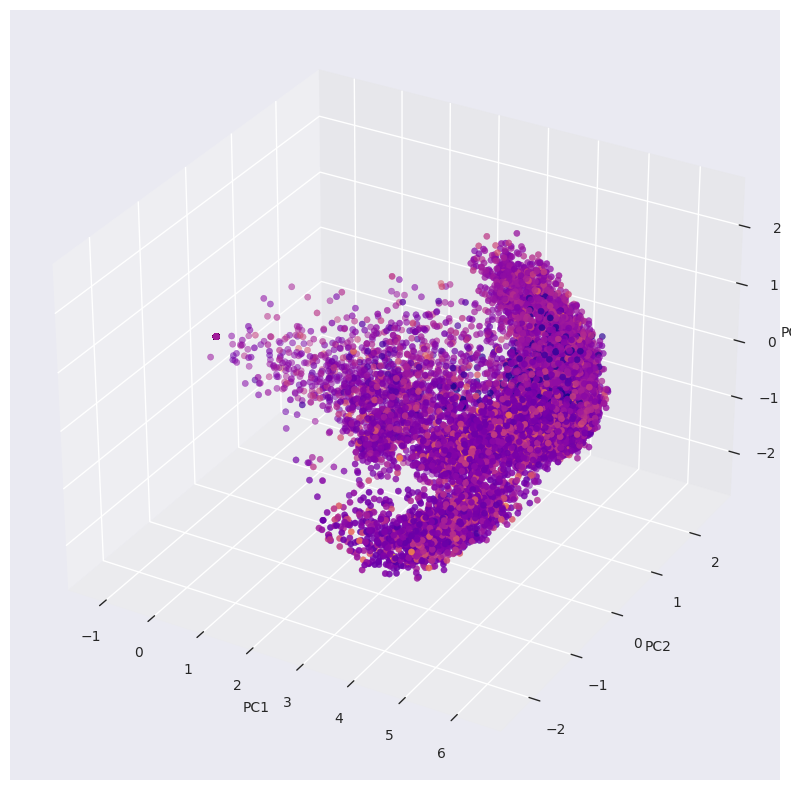

In [1602]:
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=feature_df['Runtime'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.savefig('thesis_figures/PCA_3d_plot.svg', format='svg', dpi=1200)

#### Scree Plot

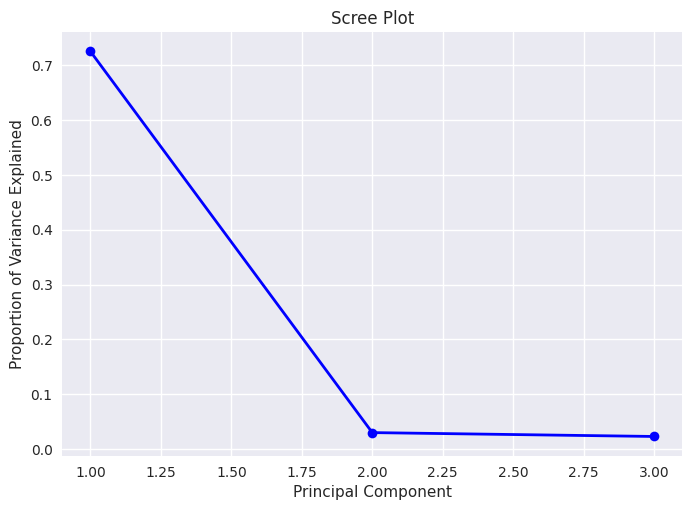

In [1603]:
PC_values = np.arange(principal.n_components_) + 1
plt.plot(PC_values, principal.explained_variance_ratio_, 'ro-', linewidth=2, color="blue")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

#### Loading Plot

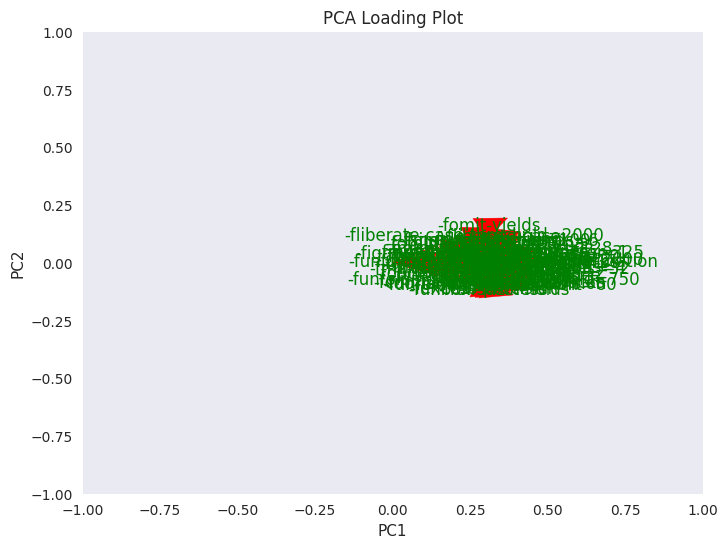

In [1604]:
# Extract loadings
loadings = principal.components_.T * np.sqrt(principal.explained_variance_)

# Plot loadings
plt.figure(figsize=(8, 6))
for i, feature in enumerate(feature_df.drop("Runtime",axis=1).columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.1, head_length=0.1, color='r')
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature, color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA Loading Plot')
plt.show()

### MCA Analysis

In [1605]:
for col in feature_df.columns:
    feature_df[col] = pd.to_numeric(feature_df[col])

In [1606]:
mca = MCA(n_components=2)
mca.fit(feature_df.drop("Runtime",axis=1))
print("Eigenvalues:")
print(mca.eigenvalues_)

# # Principal inertia
# print("Principal Inertia:")
# print(mca.explained_inertia_)

# Transformed data
print("Transformed Data:")
transformed_data = mca.transform(feature_df.drop("Runtime",axis=1))

Eigenvalues:
[0.71229263 0.03117871]
Transformed Data:


In [1607]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.712        71.23%                     71.23%
1              0.031         3.12%                     74.35%

In [1608]:
# Get the row and column coordinates (normalized singular values) after fitting
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime",axis=1))
column_coordinates = mca.column_coordinates(feature_df.drop("Runtime",axis=1))

# Calculate the variance explained by each feature after using 6 components
variance_explained_by_feature = (column_coordinates ** 2).sum(axis=1)

# Sort the features based on their contribution to the variance
top_features = variance_explained_by_feature.sort_values(ascending=False)

# Print the top 6 features
print("Top 6 features contributing the most to the variance after using 6 components:")
print(top_features.head(6))


Top 6 features contributing the most to the variance after using 6 components:
-fcmm-sink_1                        0.435199
-fregs-iterative_1                  0.415527
-fno-pre-inlining_1                 0.412376
-fliberate-case-threshold=2000_1    0.396789
-feager-blackholing_1               0.384856
-fspecialise_1                      0.351707
dtype: float64


In [1609]:
mca.column_contributions_.style.format('{:.0%}')

In [1610]:
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime",axis=1))
row_coordinates

0         1
0     0.697117 -0.167235
1     0.041015 -0.022719
2     0.134245  0.104297
3     2.148635 -0.122452
4     1.631482  0.103332
...        ...       ...
9554 -0.428924  0.000409
9555 -0.428924  0.000409
9556 -0.428924  0.000409
9557 -0.428924  0.000409
9558 -0.428924  0.000409

[49809 rows x 2 columns]

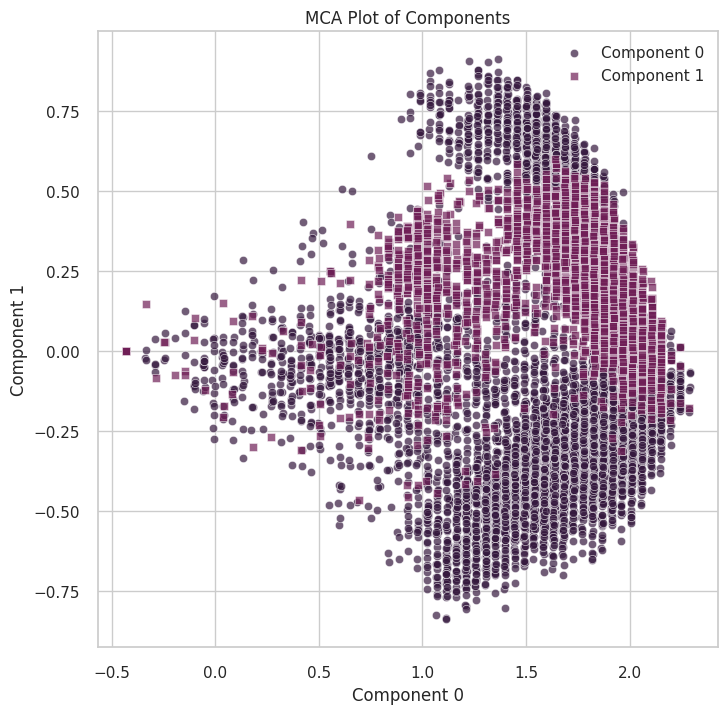

In [1611]:
import seaborn as sns

# Set seaborn style with a warm and nuanced color palette
sns.set(style="whitegrid", palette="rocket")

# Get the row coordinates (coordinates of categories) for the first two components
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime", axis=1))

# Plot the row coordinates on a scatter plot
plt.figure(figsize=(8, 8))

# Plot points for Component 0 with circles
sns.scatterplot(x=row_coordinates.iloc[:, 0][0:len(row_coordinates)//2], 
                y=row_coordinates.iloc[:, 1][0:len(row_coordinates)//2], 
                alpha=0.7, label='Component 0', marker='o')

# Plot points for Component 1 with squares
sns.scatterplot(x=row_coordinates.iloc[:, 0][len(row_coordinates)//2:], 
                y=row_coordinates.iloc[:, 1][len(row_coordinates)//2:], 
                alpha=0.7, label='Component 1', marker='s')

plt.title('MCA Plot of Components')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

# Add legend
plt.legend()
plt.savefig('thesis_figures/MCA_2d_plot.svg', format='svg', dpi=1200)
plt.show()


In [1612]:

# Compute feature coordinates (loadings)
# feature_coordinates = mca.column_coordinates(feature_df.drop("Runtime", axis=1))

# # Set seaborn style
# # sns.set()

# # Plot row coordinates (loadings)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=row_coordinates.iloc[:, 0], y=row_coordinates.iloc[:, 1], color='blue')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.title('MCA Loading Plot')

# # Plot arrows for feature loadings
# for i, feature in enumerate(feature_df.drop("Runtime", axis=1).columns):
#     plt.arrow(0, 0, feature_coordinates.iloc[i, 0], feature_coordinates.iloc[i, 1], color='red', width=0.01, head_width=0.05)
#     plt.text(feature_coordinates.iloc[i, 0]*1.1, feature_coordinates.iloc[i, 1]*1.1, feature, color='red')

# plt.grid()
# plt.show()

# Phase-Order

## Data Imports

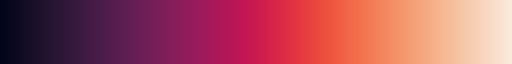

In [1687]:
plt.style.use('seaborn-v0_8')
sns.color_palette("rocket", as_cmap=True)

In [1688]:
dir_path = "files/Thesis_Files/phase_order"
phase_data_path = "../Python/phase_data.csv"

In [1689]:
# Phase Data Import
phase_data = pd.read_csv(f"{phase_data_path}", header=0)

# RIO Test Results
# cacheprof_RIO = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
# sorting_RIO = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
# maillist_RIO = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
# hidden_RIO = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-Flag_Selection_MultiProgram_Test_4Program-0.csv", index_col=[0])
cacheprof_RIO = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-Thesis_RIO-0.csv", index_col=[0])
sorting_RIO = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-Thesis_RIO-0.csv", index_col=[0])
maillist_RIO = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-Thesis_RIO-0.csv", index_col=[0])
hidden_RIO = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-Thesis_RIO-0.csv", index_col=[0])

# BOCA Test Results
# cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-BOCA_Test_4Program_04-27-2024-0.csv", index_col=[0])
# sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-BOCA_Test_4Program_04-27-2024-0.csv", index_col=[0])
# maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-BOCA_Test_4Program_04-27-2024-0.csv", index_col=[0])
# hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-BOCA_Test_4Program_04-27-2024-0.csv", index_col=[0])
cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Thesis_Test_4Program_Cons-0.csv", index_col=[0])
sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Thesis_Test_4Program_Cons-0.csv", index_col=[0])
maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Thesis_Test_4Program_Cons-0.csv", index_col=[0])
hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Thesis_Test_4Program_Cons-0.csv", index_col=[0])

# Control Group (O2 In Default Order)
cacheprof_default = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-BIGRIO-0.csv", index_col=[0])
hidden_default = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
maillist_default =  pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
sorting_default = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])

# Add additional RIO Results
for i in range(1,4):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-Thesis_RIO-{i}.csv", index_col=[0])])
    sorting_RIO= pd.concat([sorting_RIO, pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-Thesis_RIO-{i}.csv", index_col=[0])])
    maillist_RIO = pd.concat([maillist_RIO, pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-Thesis_RIO-{i}.csv", index_col=[0])])
    hidden_RIO = pd.concat([hidden_RIO, pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-Thesis_RIO-{i}.csv", index_col=[0])])


# # New Slow + Fast Rule:
cacheprof_special = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Special-Rule-Thesis-10p-0.csv", index_col=[0])
hidden_special = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Special-Rule-Thesis-10p-0.csv", index_col=[0])
maillist_special = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Special-Rule-Thesis-10p-0.csv", index_col=[0])
sorting_special = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Special-Rule-Thesis-10p-0.csv", index_col=[0])

cacheprof_special_5p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Special-Rule-Thesis-5p-0.csv", index_col=[0])
hidden_special_5p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Special-Rule-Thesis-5p-0.csv", index_col=[0])
maillist_special_5p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Special-Rule-Thesis-5p-0.csv", index_col=[0])
sorting_special_5p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Special-Rule-Thesis-5p-0.csv", index_col=[0])

cacheprof_special_1p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Special-Rule-Thesis-1p-0.csv", index_col=[0])
hidden_special_1p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Special-Rule-Thesis-1p-0.csv", index_col=[0])
maillist_special_1p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Special-Rule-Thesis-1p-0.csv", index_col=[0])
sorting_special_1p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Special-Rule-Thesis-1p-0.csv", index_col=[0])


cacheprof_special_005p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Special-Rule-Thesis-005p-0.csv", index_col=[0])
hidden_special_005p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Special-Rule-Thesis-005p-0.csv", index_col=[0])
maillist_special_005p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Special-Rule-Thesis-005p-0.csv", index_col=[0])
sorting_special_005p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Special-Rule-Thesis-005p-0.csv", index_col=[0])

# # Multi-Table test

cacheprof_special_multi = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Special-Rule-Thesis-Multi-5P-0.csv", index_col=[0])
hidden_special_multi = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Special-Rule-Thesis-Multi-5P-0.csv", index_col=[0])
maillist_special_multi = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Special-Rule-Thesis-Multi-5P-0.csv", index_col=[0])
sorting_special_multi = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Special-Rule-Thesis-Multi-5P-0.csv", index_col=[0])

# Outliers Test - Full BOCA Cycle - No Early Termination
cacheprof_outliers = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Outliers_Test-0.csv", index_col=[0])
hidden_outliers = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Outliers_Test-0.csv", index_col=[0])
maillist_outliers = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Outliers_Test-0.csv", index_col=[0])
sorting_outliers = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Outliers_Test-0.csv", index_col=[0])


program_tables = {"cacheprof": {"BOCPA": cacheprof_BOCA, "RIO": cacheprof_RIO, "O2": cacheprof_default}, "sorting": {"BOCPA": sorting_BOCA, "RIO": sorting_RIO, "O2": sorting_default}, "hidden": {"BOCPA": hidden_BOCA, "RIO":  hidden_RIO, "O2": hidden_default}, "maillist": {"BOCPA": maillist_BOCA, "RIO": maillist_RIO, "O2": maillist_default}}
correctness_tables = {"cacheprof": cacheprof_special, "hidden": hidden_special, "maillist": maillist_special, "sorting": sorting_special}
correctness_tables_5p = {"cacheprof": cacheprof_special_5p, "hidden": hidden_special_5p, "maillist": maillist_special_5p, "sorting": sorting_special_5p}
correctness_tables_1p = {"cacheprof": cacheprof_special_1p, "hidden": hidden_special_1p, "maillist": maillist_special_1p, "sorting": sorting_special_1p}
correctness_tables_005p = {"cacheprof": cacheprof_special_005p, "hidden": hidden_special_005p, "maillist": maillist_special_005p, "sorting": sorting_special_005p}
correctness_tables_multi = {"cacheprof": cacheprof_special_multi, "hidden": hidden_special_multi, "maillist": maillist_special_multi, "sorting": sorting_special_multi}
outliers_tables = {"cacheprof": cacheprof_outliers, "hidden": hidden_outliers, "maillist": maillist_outliers, "sorting": sorting_outliers}

## Data Preparation

In [1690]:
O2_list = ["liberate_case","spec_constr","rule_check2","late_specialise","triple_combo","late_dmd_anal","strict_anal","rule_check3","add_caller","add_late"] #, "my_good_optimization", "my_neutral_optimization", "my_bad_optimization", my_good_optimization_2, my_good_optimization_3, my_good_optimization_4, my_good_optimization_5, my_good_optimization_6]
O0_list = ["static_args", "presimplify","specialise","full_laziness_1","simpl3","float_in_1","call_arity","strictness","exitification","full_laziness_2","cse","float_in_2","final","rule_check1"]

### Normalization & Standardization

In [1691]:
normalized_tables = {}
tick_labels = []

for d_name, d in program_tables.items():
    for type, t in d.items():
        t["Norm-Z"] = (t["Runtime"] - t["Runtime"].mean())/t["Runtime"].std()
        t.drop(columns=["Mode"])

In [1692]:
for d_name, d in program_tables.items():
    O2_numbers = program_tables[d_name]["O2"]["Runtime"].mean()
    for type, t in d.items():
        normalize_around = O2_numbers
        offset = normalize_around - t["Runtime"].mean()
        #t["Norm-Default"] = (t["Runtime"] - normalize_around)/t["Runtime"].std()
        t["Norm-Default"] = (t["Runtime"] - normalize_around)/program_tables[d_name]["O2"]["Runtime"].std()

for d_name, df in outliers_tables.items():
    O2_numbers = program_tables[d_name]["O2"]["Runtime"].mean()
    normalize_around = O2_numbers
    offset = normalize_around - df["Runtime"].mean()
    #t["Norm-Default"] = (t["Runtime"] - normalize_around)/t["Runtime"].std()
    df["Norm-Default"] = (df["Runtime"] - normalize_around)/program_tables[d_name]["O2"]["Runtime"].std()

## Analysis

### Table (RIO vs. BOCPA vs. Default)

In [1693]:

# THIS IS USING THE BEST RUNTIME

data = []
programs = list(program_tables.keys())
configurations = ["BOCPA", "RIO"]
columns = ["Optimal", "Default", "Improvement", "Avg. Improvement"]

for program in programs:
    program_data = []
    row_O0s = []
    row_O2s = []
    for config in configurations:
        if program_tables[program][config] is not None:
            row_Optimal = round(program_tables[program][config].sort_values("Runtime", ascending=True).iloc[0]["Runtime"],3)
            row_Default = round(program_tables[program]["O2"]["Runtime"].mean(),3)
            improvement = f"{round(-1*(1 - row_Optimal/row_Default)*100,3)}%"
            average = f"{round(-1*(1 - program_tables[program][config]['Runtime'].mean()/row_Default)*100,3)}%"
            program_data.append([row_Optimal, row_Default, improvement, average])
            row_O0s.append(row_Optimal)
            row_O2s.append(row_Default)
        else:
            program_data.append([None, None, None])
    data.extend(program_data)
    
    # for config in configurations:
    #     updated_program_tables[program][config]["-O0"]["Runtime"] = round(np.mean(row_O0s),3)
    #     row_O2 = updated_program_tables[program][config]["-O2"]["Runtime"] = round(np.mean(row_O2s),3)

# Create a MultiIndex with program and configuration levels
index = pd.MultiIndex.from_product([programs, configurations], names=["Program", "Configuration"])

# print(index)
# print(data)

# Reshape data into a DataFrame
df = pd.DataFrame(data, columns=columns)


# Assign the MultiIndex
df.index = index


print(df)
df.to_csv("PO_table_results.csv")


                         Optimal  Default Improvement Avg. Improvement
Program   Configuration                                               
cacheprof BOCPA            0.111    0.118     -5.932%          -2.677%
          RIO              0.112    0.118     -5.085%          -3.406%
sorting   BOCPA            0.137    0.147     -6.803%           -3.68%
          RIO              0.138    0.147     -6.122%          -3.984%
hidden    BOCPA            0.123    0.128     -3.906%          -0.945%
          RIO              0.124    0.128     -3.125%          -1.724%
maillist  BOCPA            0.569    0.617      -7.78%           0.312%
          RIO              0.575    0.617     -6.807%          -2.897%


### Box Plots

#### Z-Score

In [1694]:
def make_Z_boxplot(program_name, tables_dict):
    fig, ax = plt.subplots()
    
    lst1 = []
    labels = []
    for type_name, t in tables_dict[program_name].items():
        if type_name != "O2":
            lst1.append(t["Norm-Z"])
            labels.append(type_name)
        
    ax.boxplot(lst1)
    ax.set_xticklabels(labels)
    ax.set_ylabel(f"Normalized Z Runtime (std)")
    ax.set_xlabel(f"Type of Optimization")
    ax.set_title(program_name)

    plt.savefig(f"thesis_figures/PO_Z_{program_name}.svg", format='svg', dpi=1200)
    plt.savefig(f"thesis_figures/PO_Z_{program_name}.png", format="png")
    plt.show()

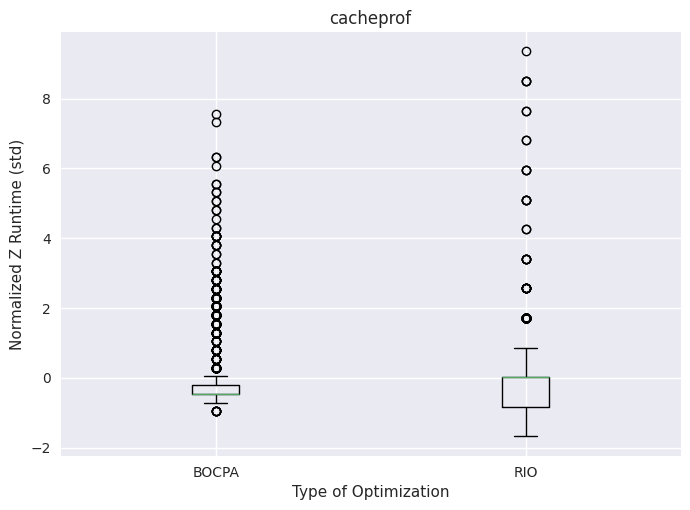

In [1695]:
make_Z_boxplot("cacheprof", program_tables)

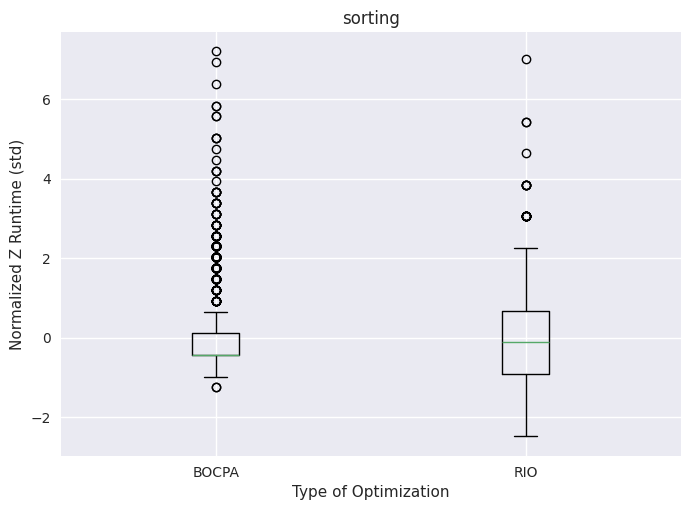

In [1696]:
make_Z_boxplot("sorting", program_tables)

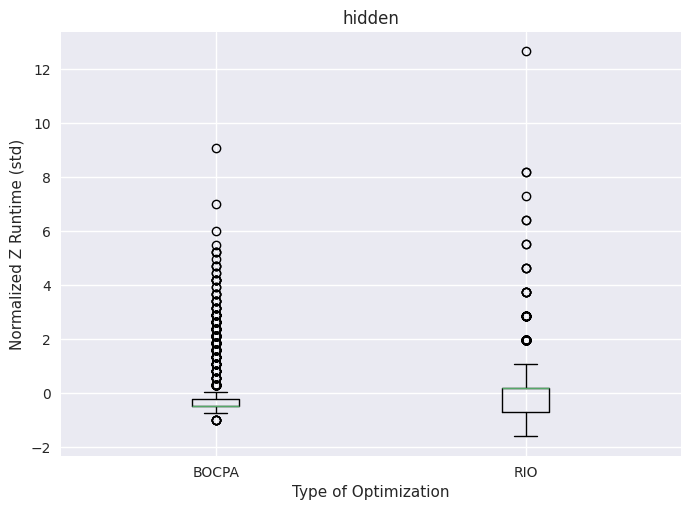

In [1697]:
make_Z_boxplot("hidden", program_tables)

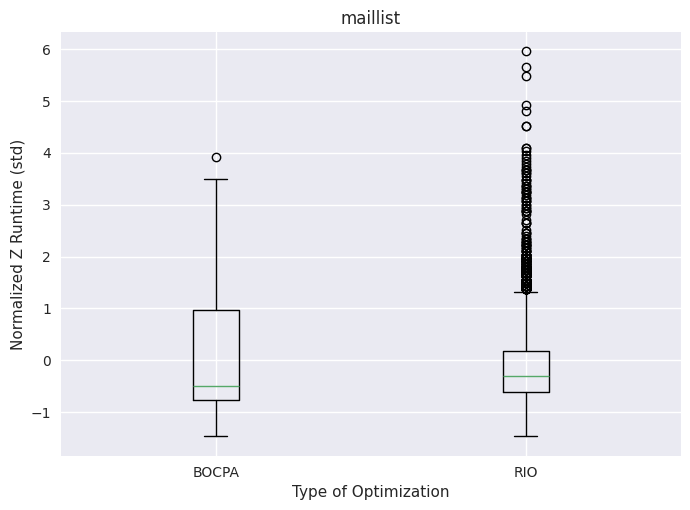

In [1698]:
make_Z_boxplot("maillist", program_tables)

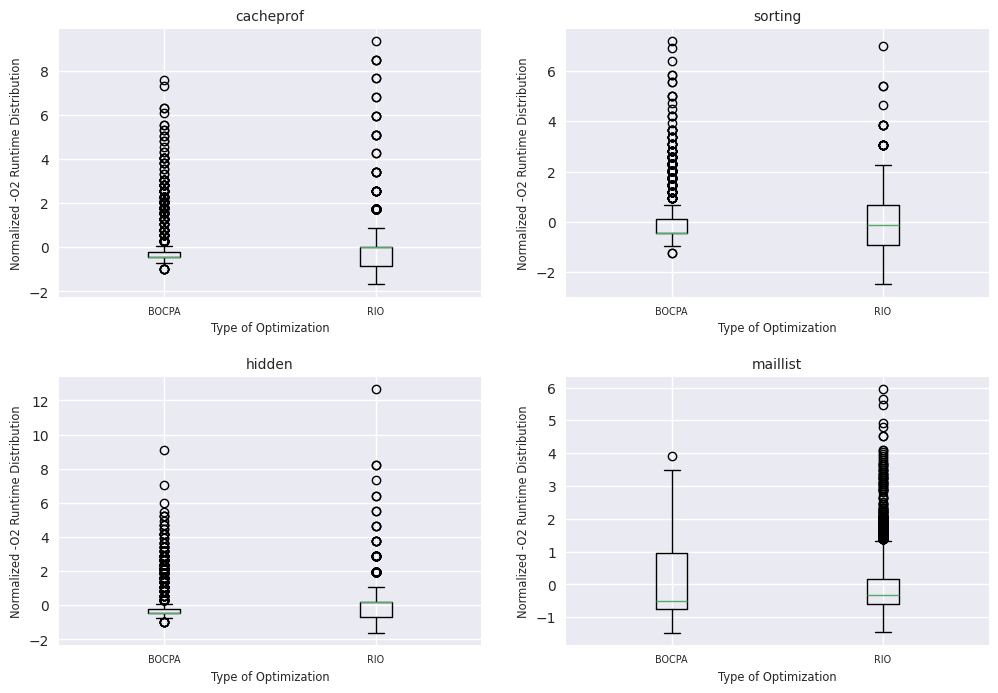

In [1699]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

lst1 = []
labels = []

i = 0
j = 0
for program_name, type_dict in program_tables.items():
    lst1 = []
    labels = []
    O0_line = 0
    for type_name, df in type_dict.items():
        if type_name != "O2":
            lst1.append(df["Norm-Z"])
            labels.append(type_name)
        
        # print(df.head(5))
        # labels.append(type_name)
        # #print(df["Norm-O2"].head(4))
        # # O0_line = df.loc["-O0"]["Norm-O2"]
        # lst1.append(df["Norm-O2"])


    
    ax[i][j].boxplot(lst1)
    ax[i][j].set_xticklabels(labels, fontsize="xx-small")
    ax[i][j].set_ylabel(f"Normalized -O2 Runtime Distribution", fontsize="x-small")
    ax[i][j].set_xlabel(f"Type of Optimization", fontsize="x-small")
    ax[i][j].set_title(f"{program_name}", fontsize="small")

    # ax[i][j].hlines(y=O0_line, xmin=0, xmax=len(labels) + 1, color='b', linestyle='dashed', linewidth=2)
    # ax[i][j].text(len(labels) + 1.1, O0_line, '-O0', fontsize='xx-small', color='b')
    
    j = (j + 1) % 2
    if j == 0:
        i = (i + 1) % 2

plt.savefig("thesis_figures/Z_PO_score_boxplot.svg", format='svg', dpi=1200)
plt.savefig('thesis_figures/Z_PO_score_boxplot.png', format='png', dpi=1200)
plt.show()


#### O2

In [1700]:
## Make O2 Plot Function

def make_O2_boxplot(program_name, hash_map):
    fig, ax = plt.subplots()

    lst1 = []
    labels = []
    program_name = program_name
    for type_name, t in hash_map[program_name].items():
        if type_name != "O2":
            lst1.append(t["Norm-Default"])
            labels.append(type_name)
        
    ax.boxplot(lst1)
    ax.set_xticklabels(labels)
    ax.set_ylabel(f"Normalized O2 Runtime (std)")
    ax.set_xlabel(f"Type of Optimization")
    ax.set_title(f"{program_name}")

    plt.savefig(f"PO_O2_{program_name}.svg", format='svg', dpi=1200)
    plt.savefig(f"PO_O2_{program_name}.png", format="png")
    plt.show()

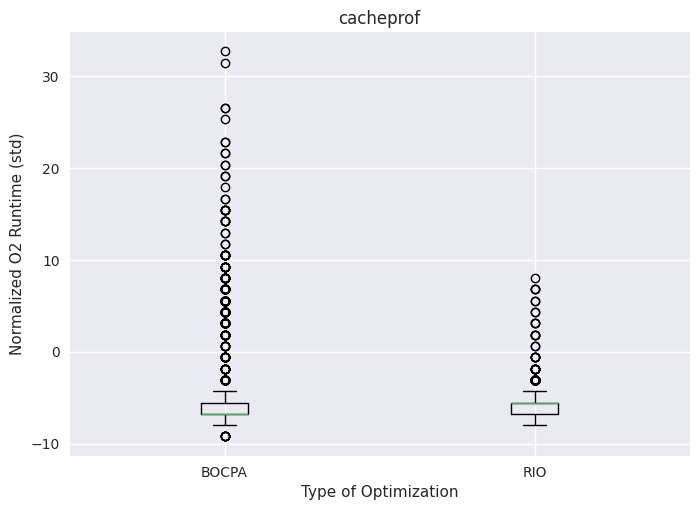

In [1701]:
make_O2_boxplot("cacheprof", program_tables)

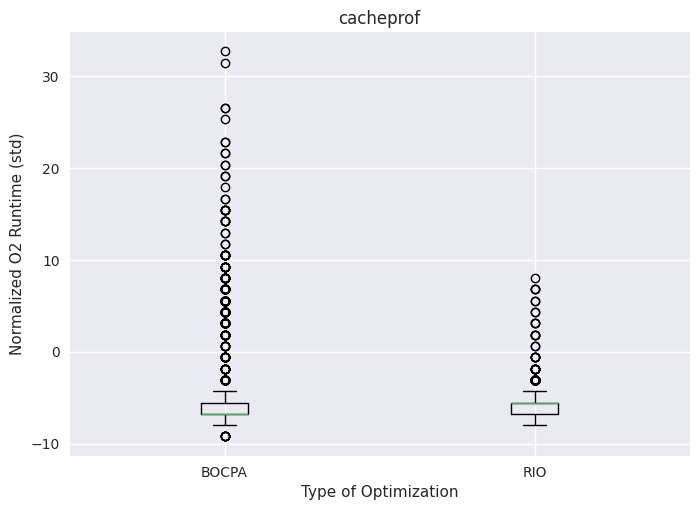

In [1702]:
make_O2_boxplot("cacheprof", program_tables)

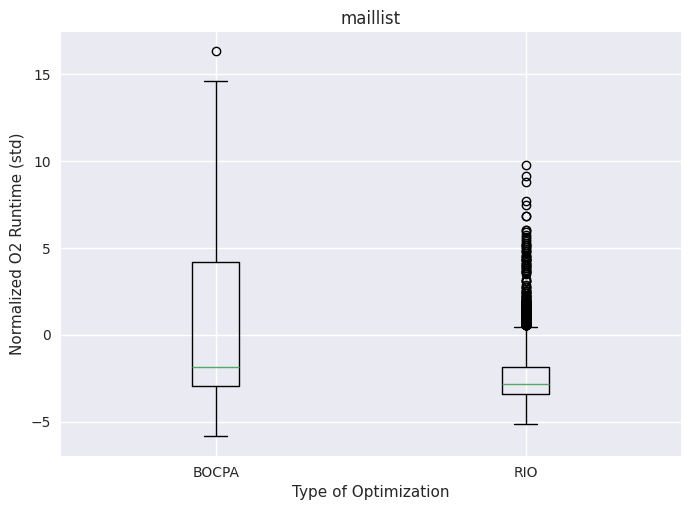

In [1703]:
make_O2_boxplot("maillist", program_tables)

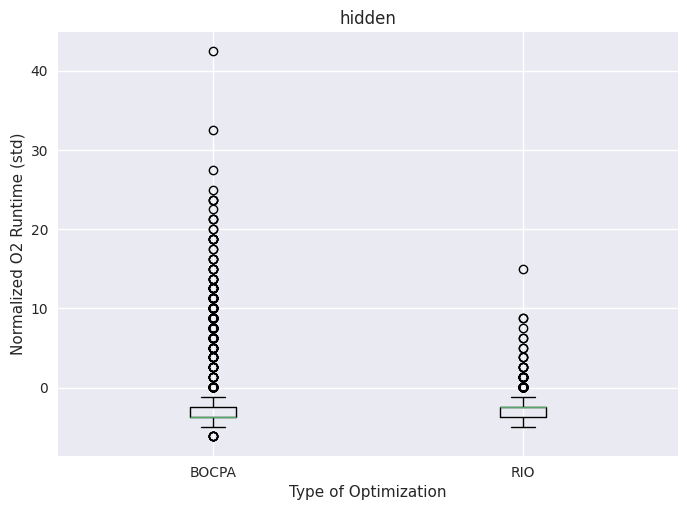

In [1704]:
make_O2_boxplot("hidden", program_tables)

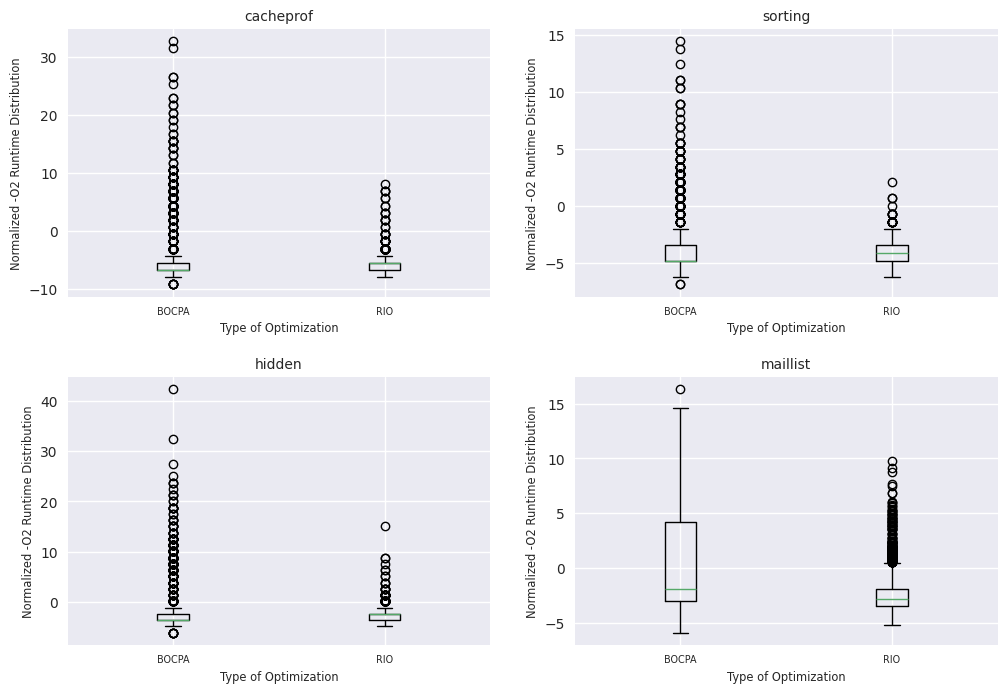

In [1705]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

lst1 = []
labels = []

i = 0
j = 0
for program_name, type_dict in program_tables.items():
    lst1 = []
    labels = []
    O0_line = 0
    for type_name, df in type_dict.items():
        if type_name != "O2":
            lst1.append(df["Norm-Default"])
            labels.append(type_name)


    
    ax[i][j].boxplot(lst1)
    ax[i][j].set_xticklabels(labels, fontsize="xx-small")
    ax[i][j].set_ylabel(f"Normalized -O2 Runtime Distribution", fontsize="x-small")
    ax[i][j].set_xlabel(f"Type of Optimization", fontsize="x-small")
    ax[i][j].set_title(f"{program_name}", fontsize="small")

    # ax[i][j].hlines(y=O0_line, xmin=0, xmax=len(labels) + 1, color='b', linestyle='dashed', linewidth=2)
    # ax[i][j].text(len(labels) + 1.1, O0_line, '-O0', fontsize='xx-small', color='b')
    
    j = (j + 1) % 2
    if j == 0:
        i = (i + 1) % 2

plt.savefig("thesis_figures/O2_PO_score_boxplot.svg", format='svg', dpi=1200)
plt.savefig('thesis_figures/O2_PO_score_boxplot.png', format='png', dpi=1200)
plt.show()


## BOCPA Correctness

In [1706]:
def has_required_tuples(tuple_list):
    for tup in  [("my_good_optimization", "my_neutral_optimization"), ("my_bad_optimization", "my_neutral_optimization")]:
        if tup in tuple_list:
            return True
    return False

def which_tuple(tuple_list):
    if ("my_good_optimization", "my_neutral_optimization") in tuple_list and ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Both"
    elif ("my_good_optimization", "my_neutral_optimization") in tuple_list:
        return "Good Only"
    elif ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Bad Only"
    else:
        return "Neither"

### Slow + Fast Rule

#### Single Rule Tests

In [1707]:
def weird_apply(iteration, df, category):
    training_set = df[df["Iteration"] <= iteration]
    total_size = training_set.count()
    groups = training_set.groupby("Rules")
    both_rule = groups.size()["Both"] if "Both" in groups.groups else 0
    good_rule = groups.size()["Good Only"] + both_rule if "Good Only" in groups.groups else 0
    bad_rule = groups.size()["Bad Only"] + both_rule if "Bad Only" in groups.groups else 0
    good_rule = good_rule / total_size
    bad_rule = bad_rule / total_size
    if category == "Good Only":
        return good_rule
    else:
        return bad_rule

In [1708]:
def build_discrimination_graph(dictionary, table_name, file_name):
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    # labels = ["Both", "Slow", "Fast"]
    
    # Scatter plot
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Runtime"]]
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
        filtered_df = df_temp.copy()
        filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)
    
        filtered_df["PercentGood"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Good Only")["Iteration"]
        filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentGood"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
        
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        axes[count].set_yticks([i/4 for i in range(5)])
        
        count += 1
    
    # Add labels and title

    fig.supxlabel('Iteration')
    fig.supylabel('% of Total Population')
    fig.suptitle(table_name)
    
    # Show the legend
    # handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    legend_elements = [
        Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
        Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
    ]
    
    fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
    # plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()


##### 10%

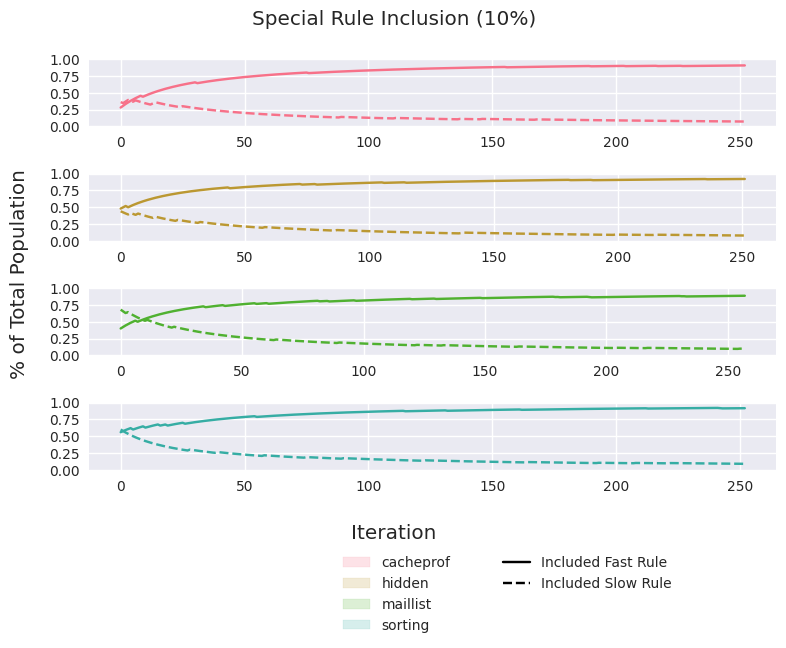

In [1709]:
build_discrimination_graph(correctness_tables, "Special Rule Inclusion (10%)", 'Distribution_Scatter_Line.png')

##### 5%

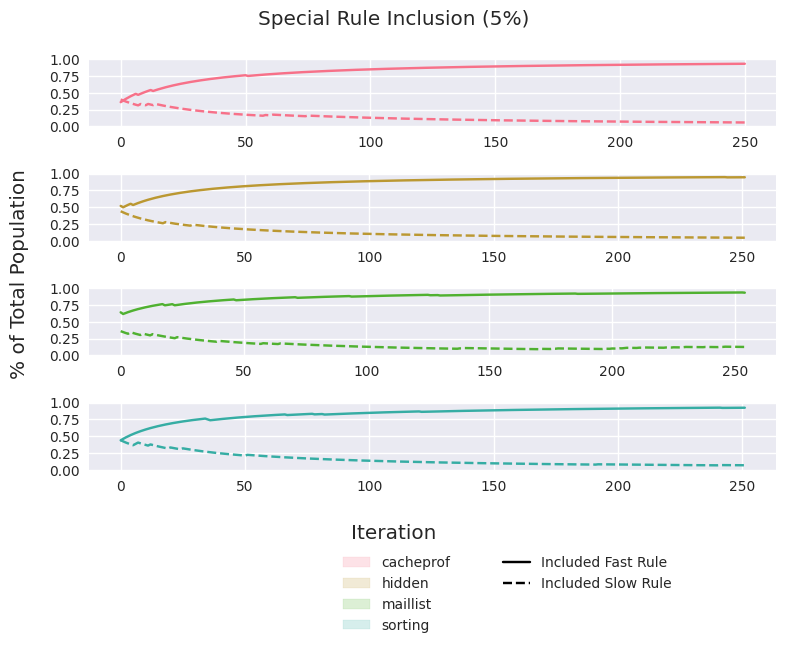

In [1710]:
build_discrimination_graph(correctness_tables_5p, "Special Rule Inclusion (5%)", 'Distribution_Scatter_Line_5p.png')

##### 1%

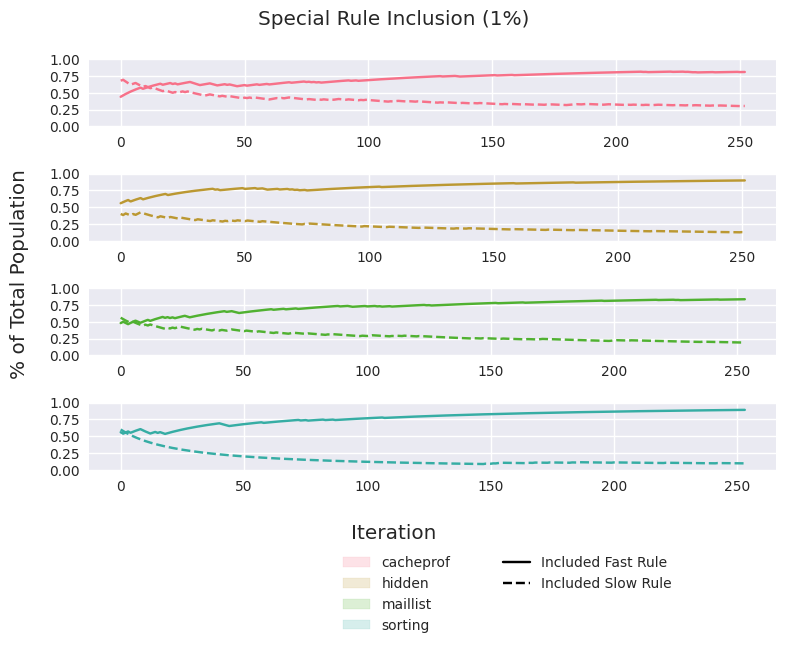

In [1711]:
build_discrimination_graph(correctness_tables_1p, "Special Rule Inclusion (1%)", 'Distribution_Scatter_Line_1p.png')

##### 0.5%

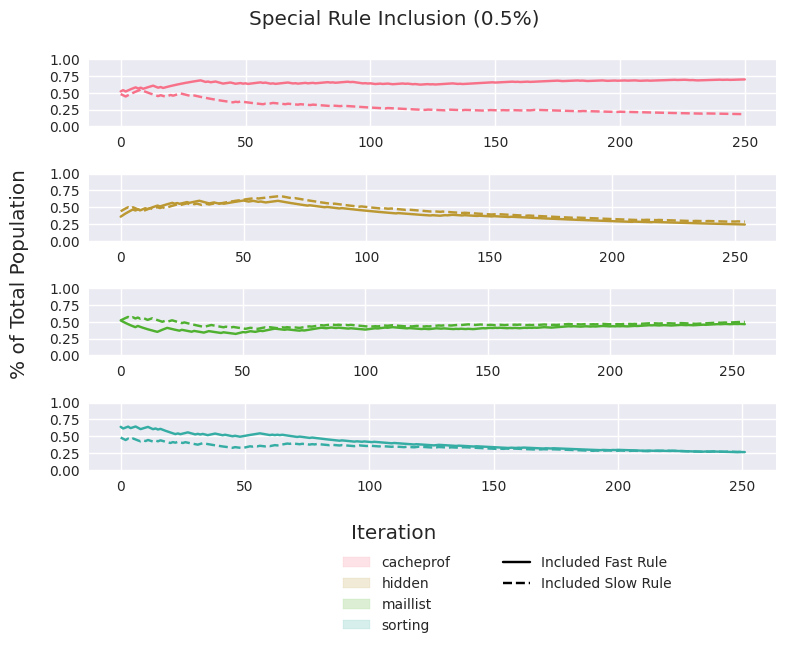

In [1712]:
build_discrimination_graph(correctness_tables_005p, "Special Rule Inclusion (0.5%)", 'Distribution_Scatter_Line_005p.png')

### Impactful Collection of Arbitrary Rules

#### Function Set-up

In [1713]:
def has_required_tuples_multi(tuple_list):
    for tup in  [("my_good_optimization", "my_neutral_optimization"), ("my_good_optimization_2", "my_neutral_optimization"), ("my_good_optimization_3", "my_neutral_optimization"), ("my_good_optimization_4", "my_neutral_optimization"), ("my_good_optimization_5", "my_neutral_optimization"), ("my_good_optimization_6", "my_neutral_optimization")]:
        if tup in tuple_list:
            return True
    return False

def which_tuple_multi(tuple_list):
    intersection_list = list(set(tuple_list).intersection(set([("my_good_optimization", "my_neutral_optimization"), ("my_good_optimization_2", "my_neutral_optimization"), ("my_good_optimization_3", "my_neutral_optimization"), ("my_good_optimization_4", "my_neutral_optimization"), ("my_good_optimization_5", "my_neutral_optimization"), ("my_good_optimization_6", "my_neutral_optimization")])))
    return len(intersection_list)

In [1714]:
# Builds Cummulative Test for Rules (NOT IMPACT LIST)
def build_cummulative_rule_graph(dictionary, graph_title, file_name):
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    # labels = ["Both", "Slow", "Fast"]
    
    # Scatter plot
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Runtime"]]
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        filtered_df = df_temp.copy()
        filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple_multi)
        filtered_df["Rules"] = filtered_df["Rules"]/6
        filtered_df["PercentCollected"] = filtered_df["Rules"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
            
        # Set custom y-axis labels
        
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        ticks = [i/6 for i in range(7)]
        tick_labels = [f'{i}/6' for i in range(7)]
        
        axes[count].set_yticks(ticks)
        axes[count].set_yticklabels(tick_labels)
        
        count += 1
    
    # Add labels and title
    fig.supxlabel('Iteration')
    fig.supylabel('Number of Rules Collected in Candidate')
    fig.suptitle(graph_title)
    
    # Show the legend
    # handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()

In [1715]:
# Builds Cummulative Test for Impact List (NOT RULE LIST)
def build_cummulative_impact_graph(dictionary, graph_title, file_name):
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    # labels = ["Both", "Slow", "Fast"]
    
    # Scatter plot
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Impactful Rules", "Runtime"]].dropna()
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        df_temp["Impactful Rules"] = df_temp["Impactful Rules"].apply(ast.literal_eval)
        
        filtered_df = df_temp.copy()
        filtered_df = df_temp.copy()
        filtered_df["Impactful Rules"] = filtered_df["Impactful Rules"].apply(which_tuple_multi)
        filtered_df["Impactful Rules"] = filtered_df["Impactful Rules"]/6
        filtered_df["PercentCollected"] = filtered_df["Impactful Rules"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
            
        # Set custom y-axis labels
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        ticks = [i/6 for i in range(7)]
        tick_labels = [f'{i}/6' for i in range(7)]
        
        axes[count].set_yticks(ticks)
        axes[count].set_yticklabels(tick_labels)
        
        # Adjust y-axis limits to prevent clipping of markers
        count += 1
    
    # Add labels and title
    fig.supxlabel('Iteration')
    fig.supylabel('Number of Rules Collected in Candidate')
    fig.suptitle(graph_title)
    
    # Show the legend
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()

In [1716]:
# Line of Best Fit Through Rules (Not Impact List)
def build_cummulative_graph_reg(dictionary, graph_title, file_name):
    dictionary = dictionary.copy()
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Impactful Rules", "Runtime"]].dropna()
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        
        filtered_df = df_temp.copy()
        filtered_df = df_temp.copy()
        filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple_multi)
        filtered_df["Rules"] = filtered_df["Rules"]/6
        filtered_df["PercentCollected"] = filtered_df["Rules"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.regplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], label=program_name, ax=axes[count])
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
            
        # Set custom y-axis labels
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        ticks = [i/6 for i in range(7)]
        tick_labels = [f'{i}/6' for i in range(7)]
        
        axes[count].set_yticks(ticks)
        axes[count].set_yticklabels(tick_labels)
        
        count += 1
    
    # Add labels and title
    fig.supxlabel('Iteration')
    fig.supylabel('Number of Rules Collected in Candidate')
    fig.suptitle(graph_title)
    
    # Show the legend
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()

#### Multi-Rule Tests

##### Cummulation

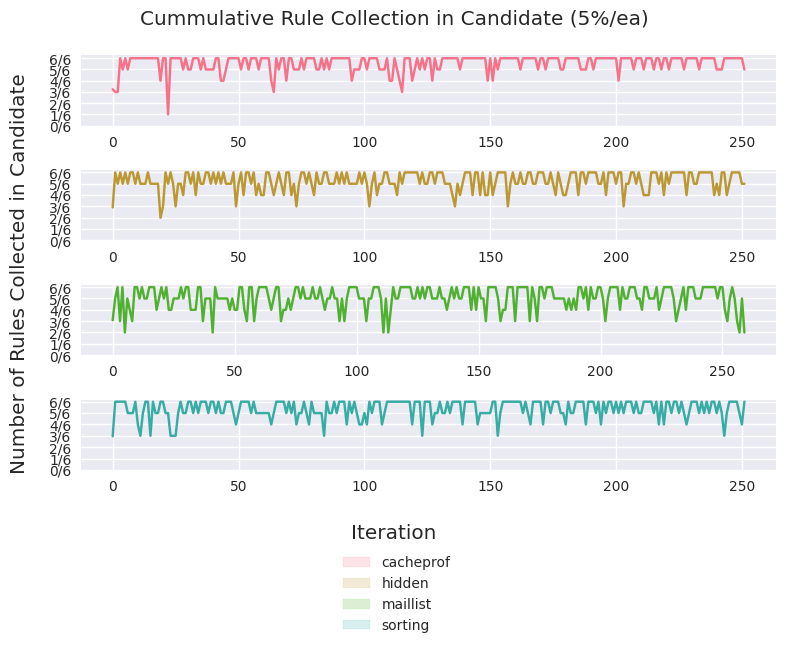

In [1717]:
build_cummulative_rule_graph(correctness_tables_multi, "Cummulative Rule Collection in Candidate (5%/ea)",  'Cumm_Rule_Collect_5p.png')

##### Cummulation Regression

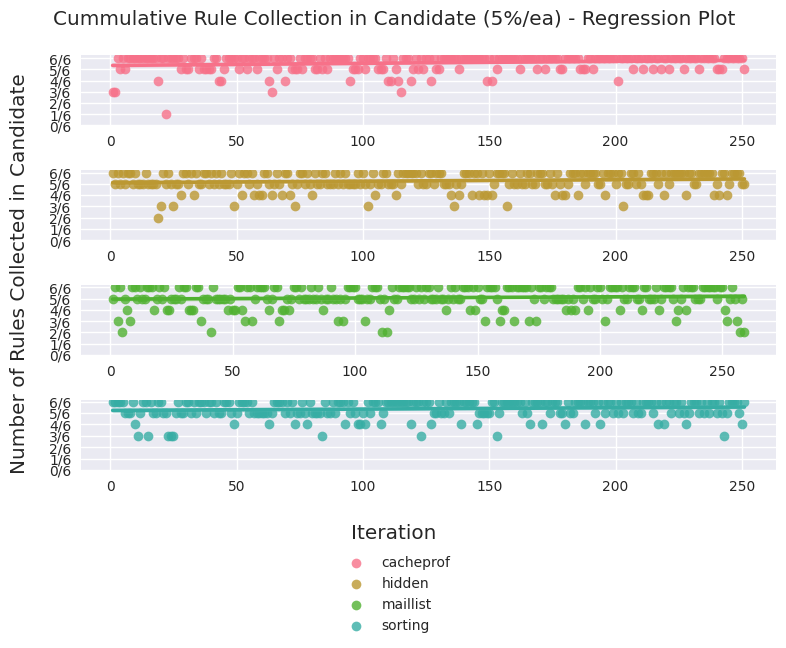

In [1718]:
build_cummulative_graph_reg(correctness_tables_multi, "Cummulative Rule Collection in Candidate (5%/ea) - Regression Plot",  'Cumm_Rule_Collect_REG_5p.png')

##### Cummulation Impact List

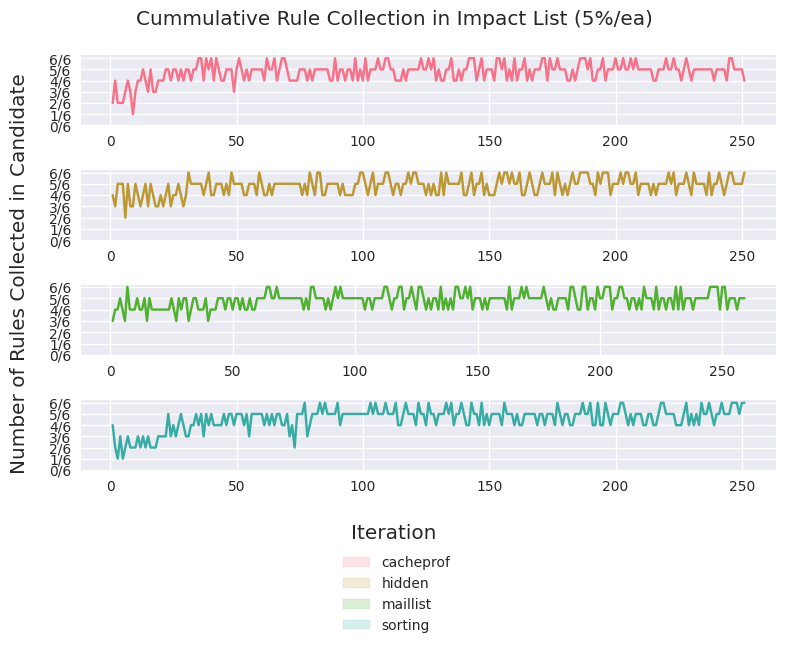

In [1719]:
build_cummulative_impact_graph(correctness_tables_multi, "Cummulative Rule Collection in Impact List (5%/ea)",  'Cumm_Rule_Collect_Impact_5p.png')

## Are the negative outliers near the beginning of the program?

### Function

In [1720]:
def compute_IQR_bad_outliers(df):
    # Method 2: Interquartile range (IQR) method
    Q1 = df['Norm-Default'].quantile(0.25)
    Q3 = df['Norm-Default'].quantile(0.75)
    IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR # Good Performing Outliers
    upper_bound = Q3 + 1.5 * IQR # Poor Peroforming Outliers
    # outliers_iqr = df[(df['Runtime'] < lower_bound) | (df['Runtime'] > upper_bound)]
    outliers_iqr = df[(df['Norm-Default'] > upper_bound) & (df['Norm-Default'] > 0)]
   # print("\nOutliers using IQR method:")
 #   print(outliers_iqr)
    return outliers_iqr

In [1721]:
def num_of_outliers(outliers_df):
    def weird_apply(iteration):
        subset = outliers_df[outliers_df["Iteration"] <= iteration]
        return len(subset.index)
    outliers_df["Outliers Num"] = outliers_df["Iteration"].apply(weird_apply)
    return outliers_df

def num_of_outliers_p(outliers_df, df):
    def weird_apply(iteration):
        subset = outliers_df[outliers_df["Iteration"] <= iteration]
        return len(subset.index)
    outliers_df["Outliers Percent"] = outliers_df["Iteration"].apply(lambda x: weird_apply(x)/len(df.index))
    return outliers_df
        

    

In [1722]:
# Line of Best Fit Through Rules (Not Impact List)
def build_all_bad_outlier_scatter_plot(graph_title, file_name):
    fig, axes = plt.subplots(4, 1)
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, type_dict in program_tables.items():
        for config, df in type_dict.items():
            if config == 'BOCPA':
                df = df.copy()
                outliers = compute_IQR_bad_outliers(df)
                
                scatter = sns.scatterplot(x=outliers["Iteration"], y=outliers["Norm-Default"], color=sns.color_palette("husl")[count % 4], label=program_name, ax=axes[count])
                handles.append(scatter.collections[0])  # Append handle for legend
                labels.append(program_name)  # Append label for legend
                    
                # Set custom y-axis labels
                axes[count].set_title(None)
                axes[count].set_xlabel(None)
                axes[count].set_ylabel(None)
                # ticks = [i/6 for i in range(7)]
                # tick_labels = [f'{i}/6' for i in range(7)]
                
                # axes[count].set_yticks(ticks)
                # axes[count].set_yticklabels(tick_labels)
                
                count += 1
    
    # Add labels and title
    fig.supxlabel('Iteration')
    fig.supylabel('Standard Deviations Worse than -O2')
    fig.suptitle(graph_title)
    
    # Show the legend
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()

In [1723]:
# Line of Best Fit Through Rules (Not Impact List)
def build_single_bad_outlier_scatter_plot(df, program_name, color):
    fig, ax = plt.subplots()
    
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    df = df.copy()
    outliers = compute_IQR_bad_outliers(df)
    scatter = sns.regplot(x=outliers["Iteration"], y=outliers["Norm-Default"], color=color, label=program_name, ax=ax)
    #handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
        
    # Set custom y-axis labels
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # Add labels and title
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Standard Deviations Worse than -O2')
    ax.set_title(f"{program_name} - Negative Outliers Prevalance as Iterations Increase")
    
    # Show the legend
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/PO_bad_outliers_{program_name}.png', bbox_inches='tight')
    plt.show()

In [1724]:
# Line of Best Fit Through Rules (Not Impact List)
def build_single_bad_outlier_line_plot(df, program_name, color):
    fig, ax = plt.subplots()
    
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    df = df.copy()
    outliers = compute_IQR_bad_outliers(df)
    outliers = num_of_outliers(outliers)
    outliers = num_of_outliers_p(outliers, df)
    scatter = sns.lineplot(x=outliers["Iteration"], y=outliers["Outliers Num"], color=color, label=program_name, ax=ax)
    #handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
        
    # Set custom y-axis labels
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # Add labels and title
    ax.set_xlabel('Iteration')
    ax.set_ylabel('# of Negative Outliers')
    ax.set_title(f"{program_name} - Negative Outliers Prevalance as Iterations Increase")
    
    # Show the legend
    # fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/PO_bad_outliers_line_{program_name}.png', bbox_inches='tight')
    plt.show()

In [1725]:
# Line of Best Fit Through Rules (Not Impact List)
def build_all_bad_outlier_line_plot(dictionary):
    plt.style.use('seaborn-v0_8')
    sns.color_palette("rocket", as_cmap=True)
    fig, ax = plt.subplots()
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, type_dict in dictionary.items():
        for config, df in type_dict.items():
            if config == 'BOCPA':
                df = df.copy()
                outliers = compute_IQR_bad_outliers(df)
                outliers = num_of_outliers(outliers)
                outliers = num_of_outliers_p(outliers, df)
                
                scatter = sns.lineplot(x=outliers["Iteration"], y=outliers["Outliers Percent"], color=sns.color_palette("husl")[count % 4], label=program_name, ax=ax)
                handles.append(scatter.collections[0])  # Append handle for legend
                labels.append(program_name)  # Append label for legend
                count += 1
                    

    # Add labels and title
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Negative Outliers Share of Total Population')
    ax.set_title(f"Negative Outliers Prevalance as Iterations Increase")
    
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/bad_outliers_line.png', bbox_inches='tight')
    plt.show()

In [1726]:
# Line of Best Fit Through Rules (Not Impact List)
def build_all_bad_outlier_line_plot_2(dictionary):
    plt.style.use('seaborn-v0_8')
    sns.color_palette("rocket", as_cmap=True)
    fig, ax = plt.subplots()
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df = df.copy()
        outliers = compute_IQR_bad_outliers(df)
        outliers = num_of_outliers(outliers)
        outliers = num_of_outliers_p(outliers, df)
        
        scatter = sns.lineplot(x=outliers["Iteration"], y=outliers["Outliers Percent"], color=sns.color_palette("husl")[count % 4], label=program_name, ax=ax)
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count += 1
                    

    # Add labels and title
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Negative Outliers Share of Total Population')
    ax.set_title(f"Negative Outliers Prevalance as Iterations Increase")
    
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/bad_outliers_line_without_termination.png', bbox_inches='tight')
    plt.show()

### Plot

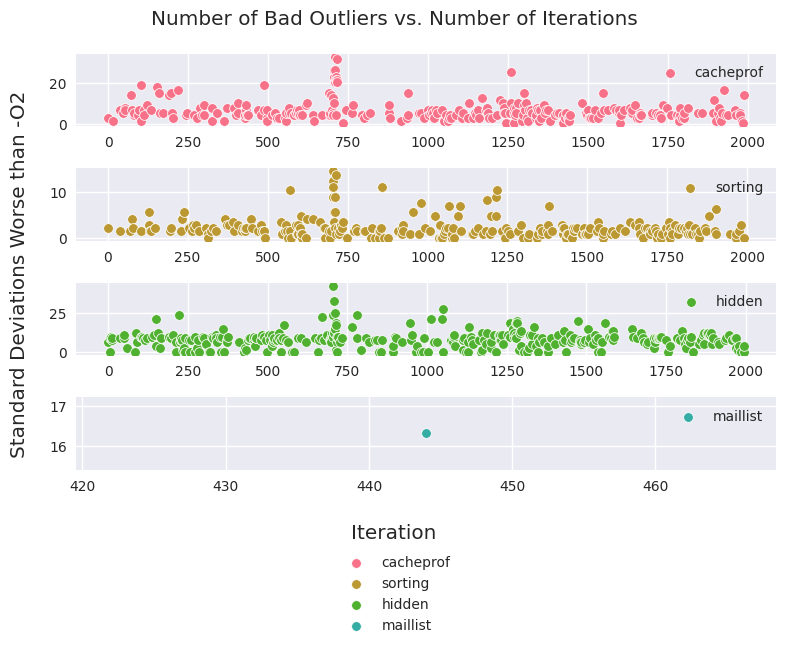

In [1727]:
build_bad_outlier_scatter_plot("Number of Bad Outliers vs. Number of Iterations", "bad_outliers_scatter.png")

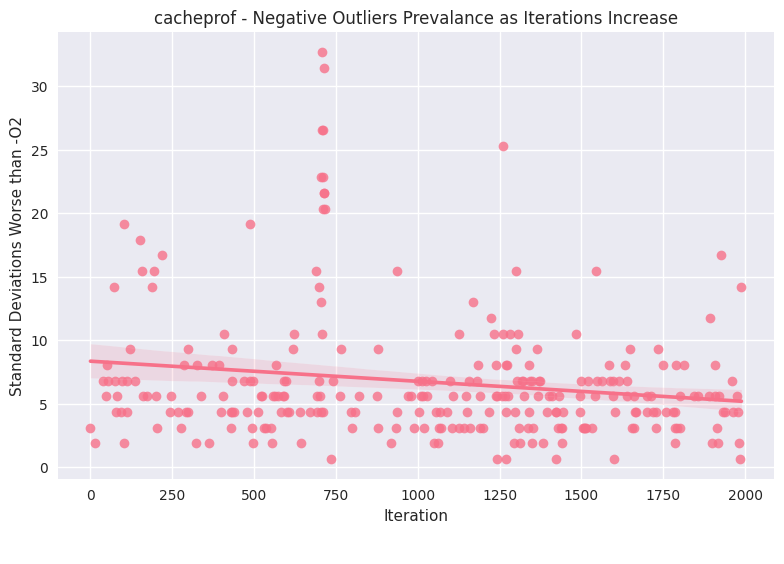

In [1728]:
color=sns.color_palette("husl")[0]
program_name = "cacheprof"
build_single_bad_outlier_scatter_plot(program_tables[program_name]["BOCPA"], program_name, color)

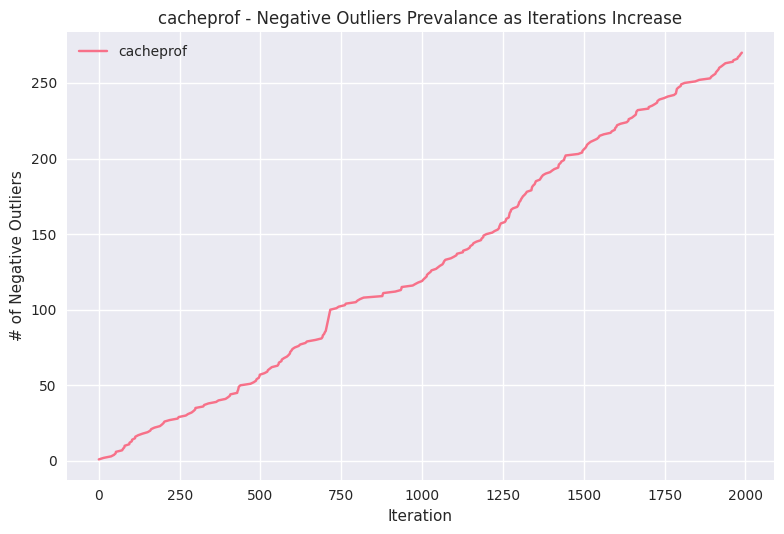

In [1729]:
color=sns.color_palette("husl")[0]
program_name = "cacheprof"
build_single_bad_outlier_line_plot(program_tables[program_name]["BOCPA"], program_name, color)

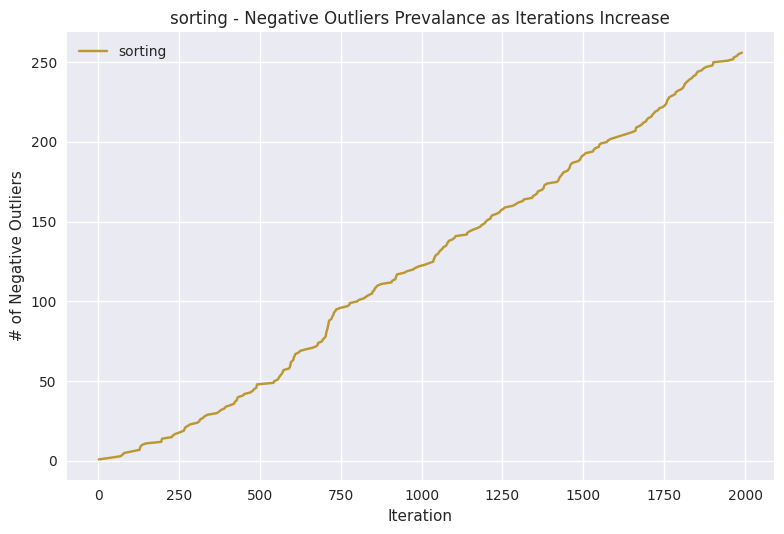

In [1730]:
color=sns.color_palette("husl")[1]
program_name = "sorting"
build_single_bad_outlier_line_plot(program_tables[program_name]["BOCPA"], program_name, color)

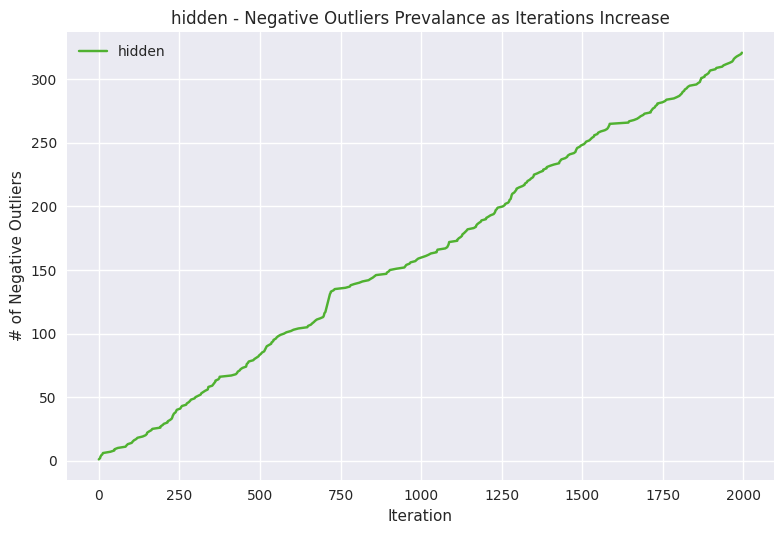

In [1731]:
color=sns.color_palette("husl")[2]
program_name = "hidden"
build_single_bad_outlier_line_plot(program_tables[program_name]["BOCPA"], program_name, color)

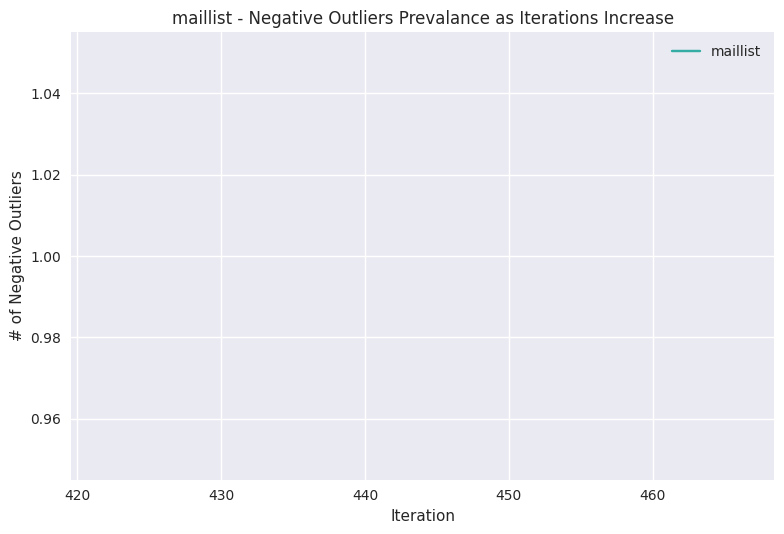

In [1732]:
color=sns.color_palette("husl")[3]
program_name = "maillist"
build_single_bad_outlier_line_plot(program_tables[program_name]["BOCPA"], program_name, color)

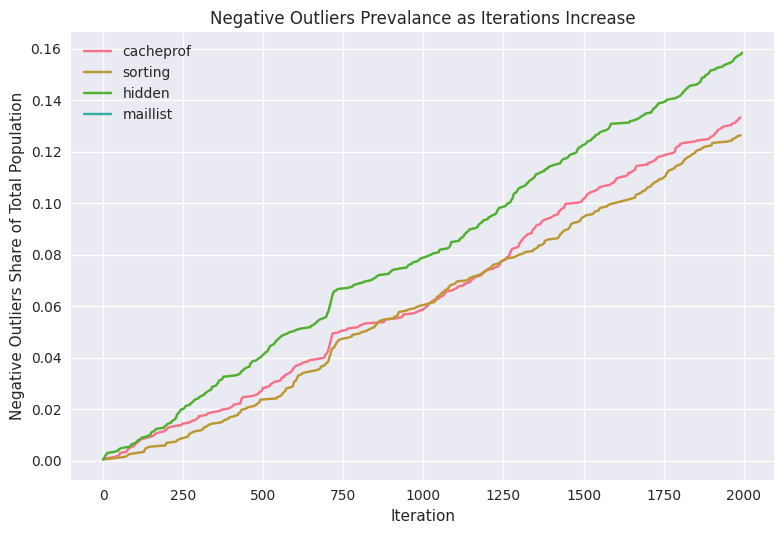

In [1733]:
build_all_bad_outlier_line_plot(program_tables)

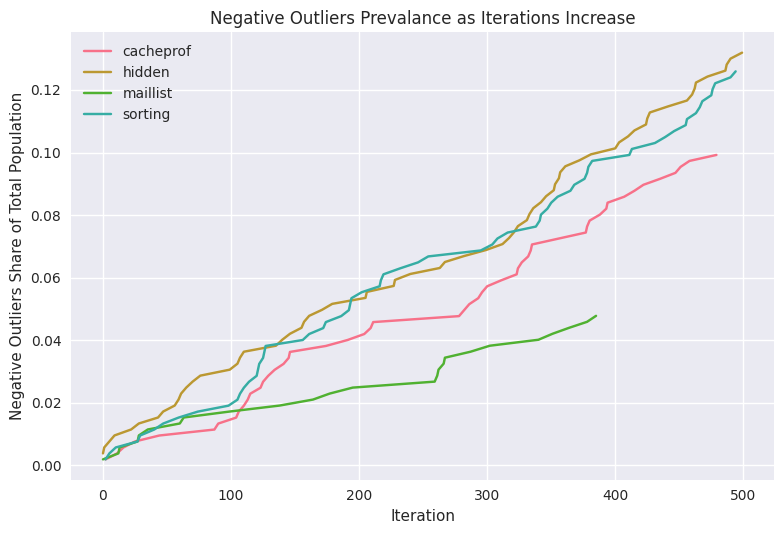

In [1734]:
build_all_bad_outlier_line_plot_2(outliers_tables)

## Feature Importance

### MCA

In [1735]:
combined_list = O0_list + O2_list

In [1736]:
def generate_all_possible_rules():
    all_rules = []
    for opt_A in combined_list:
        for opt_B in combined_list:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

In [1737]:
def generate_all_possible_valid_rules():
    # Uses the movable optimization list to create possible pairs. Does not touch the invalid list.
    all_rules = []
    for opt_A in O2_list:
        for opt_B in O2_list:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

In [1738]:
def generate_BOCA_rules(order_array):
    # Creates rules for orderings. For example ("A", "B") => "A must go before B"
    if (len(combined_list) != len(order_array)):
        raise ValueError(f"What the hell?: Combined List: {len(combined_list)}, Order List: {len(order_array)} \n {order_array}")
    rules_list = []
    blank_list = [None] * (len(combined_list))
    for index, optimization in enumerate(combined_list):
        pos_num = int(order_array[index])
        blank_list[pos_num] = optimization
    for index, opt_A in enumerate(blank_list):
        for opt_B in blank_list[index:]:
            if opt_A != opt_B:
                rules_list.append((opt_A, opt_B))
    return rules_list

In [1739]:
def split_phase_order(phase_order):
    return list(filter(lambda x: x != '', phase_order.split("|")))

#### Scaling

In [1740]:
scaling_tables = program_tables.copy()

all_rules = generate_all_possible_rules()

feature_df = pd.DataFrame(columns=all_rules + ["Runtime"])
scaled_data = []

# Iterate through each row in the original DataFrame
for program_name, config_dict in scaling_tables.items():
    for config, df in config_dict.items():
        df["Phase"] = df["Phase"].apply(split_phase_order)
        df["Phase"] = df["Phase"].apply(generate_BOCA_rules)
        new_rows = []
        for index, row in df.iterrows():
            # Initialize a list to hold flag values for this row
            rule_values = [0] * len(all_rules)
            
            # Iterate through each flag in the row
            #print(row['Flags'])
            for index, rule in enumerate(row.Phase):
                # Find the index of the flag in my_flags and set the corresponding value to 1
                if rule in all_rules:
                    rule_values[all_rules.index(rule)] = 1
                
            # Append the row to the new DataFrame with flag values and Runtime
            new_rows.append(rule_values + [None])
        scaling=StandardScaler()
        scaling.fit(np.array(df["Runtime"]).reshape(-1, 1))
        scaled_data=scaling.transform(np.array(df["Runtime"]).reshape(-1, 1))
        for index, row in enumerate(new_rows):
            row[len(row) - 1] = scaled_data[index][0]
        new_df = pd.DataFrame(columns=feature_df.columns, data=new_rows)
        feature_df = pd.concat([feature_df, new_df], axis=0)
        

# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(np.array(feature_df["Runtime"]).reshape(-1, 1))
# scaled_data=scaling.transform(np.array(feature_df["Runtime"]).reshape(-1, 1))

feature_df.tail(3)

(static_args, presimplify) (static_args, specialise)  \
297                          1                         1   
298                          1                         1   
299                          1                         1   

    (static_args, full_laziness_1) (static_args, simpl3)  \
297                              1                     1   
298                              1                     1   
299                              1                     1   

    (static_args, float_in_1) (static_args, call_arity)  \
297                         1                         1   
298                         1                         1   
299                         1                         1   

    (static_args, strictness) (static_args, exitification)  \
297                         1                            1   
298                         1                            1   
299                         1                            1   

    (static_args, full_laziness_2) (static_args, cse)  ...  \
297                              1                  1  ...   
298                              1                  1  ...   
299                              1                  1  ...   

    (add_late, liberate_case) (add_late, spec_constr) (add_late, rule_check2)  \
297                         0                       1                       1   
298                         0                       1                       1   
299                         0                       1                       0   

    (add_late, late_specialise) (add_late, triple_combo)  \
297                           1                        1   
298                           0                        0   
299                           0                        1   

    (add_late, late_dmd_anal) (add_late, strict_anal) (add_late, rule_check3)  \
297                         0                       1                       0   
298                         1                       0                       1   
299                         0                       0                       0   

    (add_late, add_caller)   Runtime  
297                      1 -0.771562  
298                      1 -0.892941  
299                      0 -1.135697  

[3 rows x 553 columns]

#### MCA Plots

In [1741]:
for col in feature_df.columns:
    feature_df[col] = pd.to_numeric(feature_df[col])

In [1742]:
mca = MCA(n_components=2)
mca.fit(feature_df.drop("Runtime",axis=1))
print("Eigenvalues:")
print(mca.eigenvalues_)



# Transformed data
print("Transformed Data:")
transformed_data = mca.transform(feature_df.drop("Runtime",axis=1))

Eigenvalues:
[0.01838781 0.01574992]
Transformed Data:


In [1743]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.018        11.28%                     11.28%
1              0.016         9.66%                     20.94%

In [1744]:
# Get the row and column coordinates (normalized singular values) after fitting
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime",axis=1))
column_coordinates = mca.column_coordinates(feature_df.drop("Runtime",axis=1))

# Calculate the variance explained by each feature after using 6 components
variance_explained_by_feature = (column_coordinates ** 2).sum(axis=1)

# Sort the features based on their contribution to the variance
top_features = variance_explained_by_feature.sort_values(ascending=False)

# Print the top 6 features
print("Top 6 features contributing the most to the variance after using 6 components:")
top_features.head(6)

Top 6 features contributing the most to the variance after using 6 components:


('strict_anal', 'add_late')_1         0.001582
('add_late', 'strict_anal')_0         0.001582
('liberate_case', 'rule_check3')_0    0.001457
('rule_check3', 'liberate_case')_1    0.001457
('strict_anal', 'triple_combo')_1     0.001324
('triple_combo', 'strict_anal')_0     0.001324
dtype: float64

In [1745]:
mca.column_contributions_.style.format('{:.0%}')

In [1746]:
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime",axis=1))
row_coordinates

0         1
0   -0.013646  0.130406
1   -0.020739 -0.107003
2    0.206521  0.075668
3    0.133064  0.196357
4    0.337007  0.162013
..        ...       ...
295  0.099390 -0.015103
296 -0.060900  0.224020
297  0.057575 -0.090017
298  0.086293 -0.063869
299  0.323617  0.128811

[17315 rows x 2 columns]

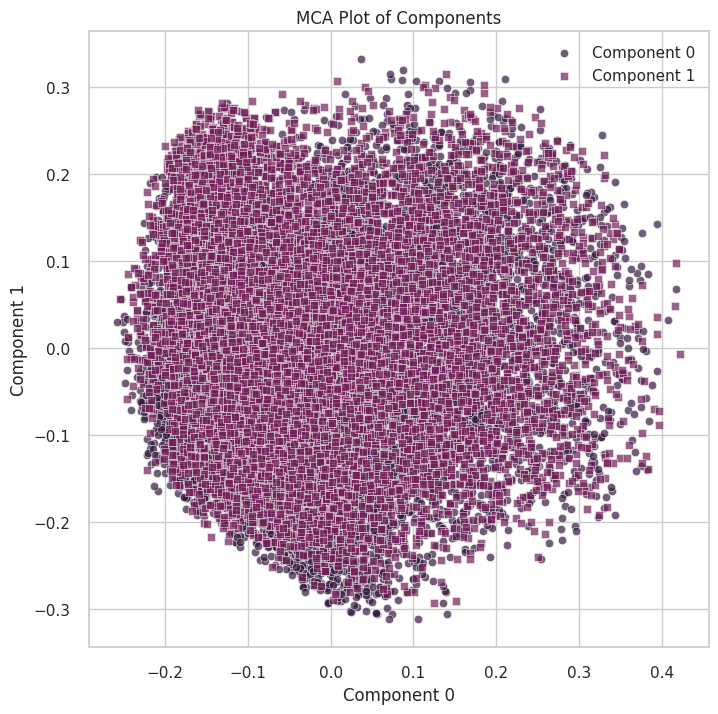

In [1747]:
import seaborn as sns

# Set seaborn style with a warm and nuanced color palette
sns.set(style="whitegrid", palette="rocket")

# Get the row coordinates (coordinates of categories) for the first two components
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime", axis=1))

# Plot the row coordinates on a scatter plot
plt.figure(figsize=(8, 8))

# Plot points for Component 0 with circles
sns.scatterplot(x=row_coordinates.iloc[:, 0][0:len(row_coordinates)//2], 
                y=row_coordinates.iloc[:, 1][0:len(row_coordinates)//2], 
                alpha=0.7, label='Component 0', marker='o')

# Plot points for Component 1 with squares
sns.scatterplot(x=row_coordinates.iloc[:, 0][len(row_coordinates)//2:], 
                y=row_coordinates.iloc[:, 1][len(row_coordinates)//2:], 
                alpha=0.7, label='Component 1', marker='s')

plt.title('MCA Plot of Components')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

# Add legend
plt.legend()
plt.savefig('thesis_figures/PO_MCA_2d_plot.svg', format='svg', dpi=1200)
plt.savefig('thesis_figures/PO_MCA_2d_plot.png', format='png', dpi=1200)
plt.show()


### MCA = Impactful Features from BOCPA?

#### Counter Set-up

In [1748]:
impactful_entries = []

counter_tables = program_tables.copy()

for program_name, tables in counter_tables.items():
    for model, t in tables.items():
        top_entries_t = []
        if model == "BOCPA":
            t = t.dropna()
            t['Impactful Rules'] = t['Impactful Rules'].apply(ast.literal_eval)
            # df_sorted = t.sort_values("Runtime", ascending=True)
            impactful_entries.append(list(t["Impactful Rules"]))
            # impactful_entries.append(list(df_sorted[df_sorted["Runtime"] <= program_tables[program_name]["O2"]["Runtime"].mean()]["Impactful Rules"]))

tuple_count_per_program = []

for program in impactful_entries:
    flat_list = list(set([item for sublist in program for item in sublist]))
    tuple_count_per_program.append(Counter(flat_list))

big_counter = Counter()

for program_counter in tuple_count_per_program:
    big_counter += program_counter

top_counter_10 = big_counter.most_common(10)

print("Top 10 Elements:")
for element, count in top_counter_10:
    print(f"{element},")

Top 10 Elements:
('strict_anal', 'add_late'),
('add_late', 'late_specialise'),
('rule_check2', 'rule_check3'),
('rule_check3', 'add_late'),
('late_specialise', 'rule_check3'),
('add_caller', 'late_specialise'),
('rule_check2', 'add_late'),
('liberate_case', 'add_caller'),
('strict_anal', 'triple_combo'),
('late_specialise', 'add_late'),


In [1749]:
top_features.head(10)

('strict_anal', 'add_late')_1         0.001582
('add_late', 'strict_anal')_0         0.001582
('liberate_case', 'rule_check3')_0    0.001457
('rule_check3', 'liberate_case')_1    0.001457
('strict_anal', 'triple_combo')_1     0.001324
('triple_combo', 'strict_anal')_0     0.001324
('strict_anal', 'rule_check2')_1      0.001108
('rule_check2', 'strict_anal')_0      0.001108
('late_dmd_anal', 'add_late')_1       0.000870
('add_late', 'late_dmd_anal')_0       0.000870
dtype: float64

### MCA to Predict Working Behavior

#### MCA

In [1750]:
new_table = phase_data.copy()
feature_df = pd.DataFrame(columns=all_rules + ["worked"])
scaled_data = []

# Iterate through each row in the original DataFrame
new_table["phase"] = new_table["phase"].apply(split_phase_order)
new_table["phase"] = new_table["phase"].apply(generate_BOCA_rules)
new_rows = []
for index, row in new_table.iterrows():
    # Initialize a list to hold flag values for this row
    rule_values = [0] * len(all_rules)
    
    # Iterate through each flag in the row
    #print(row['Flags'])
    for index, rule in enumerate(row.phase):
        # Find the index of the flag in my_flags and set the corresponding value to 1
        if rule in all_rules:
            rule_values[all_rules.index(rule)] = 1
        
    # Append the row to the new DataFrame with flag values and Runtime
    new_rows.append(rule_values + [row.worked])
    
new_df = pd.DataFrame(columns=feature_df.columns, data=new_rows)
feature_df = pd.concat([feature_df, new_df], axis=0)

feature_df.tail(3)

(static_args, presimplify) (static_args, specialise)  \
1686                          1                         1   
1687                          1                         1   
1688                          1                         1   

     (static_args, full_laziness_1) (static_args, simpl3)  \
1686                              1                     1   
1687                              1                     1   
1688                              1                     1   

     (static_args, float_in_1) (static_args, call_arity)  \
1686                         1                         1   
1687                         1                         1   
1688                         1                         1   

     (static_args, strictness) (static_args, exitification)  \
1686                         1                            1   
1687                         1                            1   
1688                         1                            1   

     (static_args, full_laziness_2) (static_args, cse)  ...  \
1686                              1                  1  ...   
1687                              1                  1  ...   
1688                              1                  1  ...   

     (add_late, liberate_case) (add_late, spec_constr)  \
1686                         0                       0   
1687                         0                       0   
1688                         0                       0   

     (add_late, rule_check2) (add_late, late_specialise)  \
1686                       0                           0   
1687                       0                           0   
1688                       0                           1   

     (add_late, triple_combo) (add_late, late_dmd_anal)  \
1686                        0                         0   
1687                        0                         0   
1688                        0                         0   

     (add_late, strict_anal) (add_late, rule_check3) (add_late, add_caller)  \
1686                       1                       0                      0   
1687                       1                       1                      0   
1688                       0                       0                      0   

     worked  
1686      1  
1687      1  
1688      1  

[3 rows x 553 columns]

In [1751]:
for col in feature_df.columns:
    feature_df[col] = pd.to_numeric(feature_df[col])

In [1752]:
mca = MCA(n_components=2)
mca.fit(feature_df.drop("worked",axis=1))
print("Eigenvalues:")
print(mca.eigenvalues_)



# Transformed data
print("Transformed Data:")
transformed_data = mca.transform(feature_df.drop("worked",axis=1))

Eigenvalues:
[0.35394068 0.02359023]
Transformed Data:


In [1753]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.354        38.61%                     38.61%
1              0.024         2.57%                     41.19%

In [1754]:
# Get the row and column coordinates (normalized singular values) after fitting
row_coordinates = mca.row_coordinates(feature_df.drop("worked",axis=1))
column_coordinates = mca.column_coordinates(feature_df.drop("worked",axis=1))

# Calculate the variance explained by each feature after using 6 components
variance_explained_by_feature = (column_coordinates ** 2).sum(axis=1)

# Sort the features based on their contribution to the variance
top_features = variance_explained_by_feature.sort_values(ascending=False)

# Print the top 6 features
print("Top 6 features contributing the most to the variance after using 6 components:")
top_features.head(6)

Top 6 features contributing the most to the variance after using 6 components:


('full_laziness_1', 'float_in_2')_0    5.102149
('float_in_2', 'full_laziness_1')_1    5.102149
('full_laziness_1', 'call_arity')_0    4.989402
('call_arity', 'full_laziness_1')_1    4.989402
('full_laziness_1', 'float_in_1')_0    4.935725
('float_in_1', 'full_laziness_1')_1    4.935725
dtype: float64

In [1755]:
# mca.column_contributions_.style.format('{:.0%}')

In [1756]:
row_coordinates = mca.row_coordinates(feature_df.drop("worked",axis=1))
row_coordinates

0         1
0    -0.308072 -0.033698
1    -0.311656 -0.000786
2    -0.309944 -0.024917
3    -0.309944 -0.024917
4    -0.308072 -0.033698
...        ...       ...
1684 -0.309438  0.012477
1685 -0.308125 -0.011793
1686 -0.309722 -0.038141
1687 -0.307364 -0.063360
1688 -0.310145 -0.034453

[1689 rows x 2 columns]

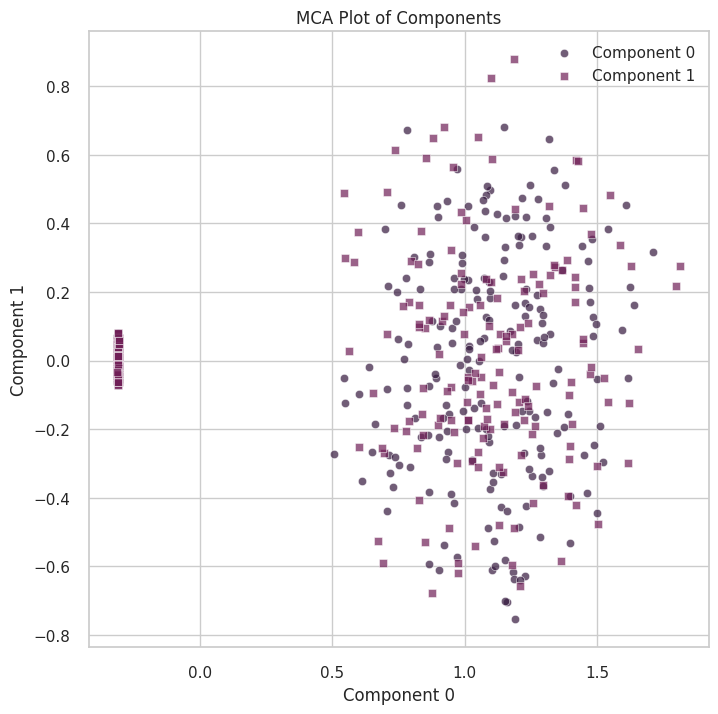

In [1757]:
import seaborn as sns

# Set seaborn style with a warm and nuanced color palette
sns.set(style="whitegrid", palette="rocket")

# Get the row coordinates (coordinates of categories) for the first two components
row_coordinates = mca.row_coordinates(feature_df.drop("worked", axis=1))

# Plot the row coordinates on a scatter plot
plt.figure(figsize=(8, 8))

# Plot points for Component 0 with circles
sns.scatterplot(x=row_coordinates.iloc[:, 0][0:len(row_coordinates)//2], 
                y=row_coordinates.iloc[:, 1][0:len(row_coordinates)//2], 
                alpha=0.7, label='Component 0', marker='o')

# Plot points for Component 1 with squares
sns.scatterplot(x=row_coordinates.iloc[:, 0][len(row_coordinates)//2:], 
                y=row_coordinates.iloc[:, 1][len(row_coordinates)//2:], 
                alpha=0.7, label='Component 1', marker='s')

plt.title('MCA Plot of Components')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

# Add legend
plt.legend()
plt.savefig('thesis_figures/PO_Worked_MCA_2d_plot.svg', format='svg', dpi=1200)
plt.show()

#### SVM

##### Model

In [1758]:


clf = svm.SVC(kernel='linear')
classification_set = phase_data.copy()


classification_set = phase_data.drop("worked",axis=1)

classification_set["phase"] = classification_set["phase"].apply(split_phase_order)
classification_set["phase"] = classification_set["phase"].apply(generate_BOCA_rules)
new_rows = []
for index, row in classification_set.iterrows():
    # Initialize a list to hold flag values for this row
    rule_values = [0] * len(all_rules)
    
    # Iterate through each flag in the row
    #print(row['Flags'])
    for index, rule in enumerate(row.phase):
        # Find the index of the flag in my_flags and set the corresponding value to 1
        if rule in all_rules:
            rule_values[all_rules.index(rule)] = 1
        
    # Append the row to the new DataFrame with flag values and Runtime
    new_rows.append(rule_values)
    
classification_set = pd.DataFrame(columns=all_rules, data=new_rows)
#classification_set = pd.concat([feature_df, new_df], axis=0)

classification_set.tail(3)

(static_args, presimplify)  (static_args, specialise)  \
1686                           1                          1   
1687                           1                          1   
1688                           1                          1   

      (static_args, full_laziness_1)  (static_args, simpl3)  \
1686                               1                      1   
1687                               1                      1   
1688                               1                      1   

      (static_args, float_in_1)  (static_args, call_arity)  \
1686                          1                          1   
1687                          1                          1   
1688                          1                          1   

      (static_args, strictness)  (static_args, exitification)  \
1686                          1                             1   
1687                          1                             1   
1688                          1                             1   

      (static_args, full_laziness_2)  (static_args, cse)  ...  \
1686                               1                   1  ...   
1687                               1                   1  ...   
1688                               1                   1  ...   

      (add_late, rule_check1)  (add_late, liberate_case)  \
1686                        0                          0   
1687                        0                          0   
1688                        0                          0   

      (add_late, spec_constr)  (add_late, rule_check2)  \
1686                        0                        0   
1687                        0                        0   
1688                        0                        0   

      (add_late, late_specialise)  (add_late, triple_combo)  \
1686                            0                         0   
1687                            0                         0   
1688                            1                         0   

      (add_late, late_dmd_anal)  (add_late, strict_anal)  \
1686                          0                        1   
1687                          0                        1   
1688                          0                        0   

      (add_late, rule_check3)  (add_late, add_caller)  
1686                        0                       0  
1687                        1                       0  
1688                        0                       0  

[3 rows x 552 columns]

##### Metrics

In [1759]:
X = classification_set
y = phase_data["worked"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

clf.fit(X_train, y_train)
transformed_candidates = pd.DataFrame(columns=all_rules)

# Predict using the classifier
predict = clf.predict(X_test)
predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [1760]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, predict))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, predict))

Accuracy: 0.9980276134122288
Precision: 0.9848484848484849
Recall: 1.0
